# **check access to the GPU**

In [ ]:
!nvidia-smi

Thu Nov 30 16:49:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install dependences

In [ ]:
!pip install fiftyone
!pip install fiftyone-db-ubuntu2204
!pip install ultralytics comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.4/586.4 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 46.3 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.4
    Uninstalling websocket-client-1.6.4:
      Successfully uninstalled websocket-client-1.6.4
  Attempting uninstall: python-box
    Found existing installation: pytho

#**Importing the Required Libraries**

In [ ]:
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()

In [ ]:
import fiftyone as fo
import fiftyone.utils.ultralytics as fou
import fiftyone.zoo as foz

Migrating database to v0.22.3


INFO:fiftyone.migrations.runner:Migrating database to v0.22.3


In [ ]:
import comet_ml
import ultralytics
from ultralytics import YOLO

# Load Dataset

In [ ]:
ds_train = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    dataset_name="COCO-2017-train",
    label_types=["detections"],
    classes=["person"],
    shuffle=True,
    dataset_dir='./data',
    max_samples=4000,
    seed=43
)

ds_val = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="COCO-2017-validation",
    label_types=["detections"],
    classes=["person"],
    shuffle=True,
    dataset_dir='./data',
    max_samples=500,
    seed=43
)

ds_test = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    dataset_name="COCO-2017-test",
    label_types=["detections"],
    classes=["person"],
    shuffle=True,
    dataset_dir='./data',
    max_samples=500,
    seed=43
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to './data/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to './data/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [4.9s elapsed, 0s remaining, 443.9Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [4.9s elapsed, 0s remaining, 443.9Mb/s]       


Extracting annotations to 'data/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to 'data/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 4000 images


 100% |████████████████| 4000/4000 [13.9m elapsed, 0s remaining, 5.0 images/s]      


INFO:eta.core.utils: 100% |████████████████| 4000/4000 [13.9m elapsed, 0s remaining, 5.0 images/s]      


Writing annotations for 4000 downloaded samples to './data/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 4000 downloaded samples to './data/train/labels.json'


Dataset info written to './data/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to './data/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████| 4000/4000 [30.1s elapsed, 0s remaining, 162.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 4000/4000 [30.1s elapsed, 0s remaining, 162.4 samples/s]      


Dataset 'COCO-2017-train' created


INFO:fiftyone.zoo.datasets:Dataset 'COCO-2017-train' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to './data/validation' if necessary


Found annotations at 'data/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at 'data/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 500 images


 100% |██████████████████| 500/500 [1.8m elapsed, 0s remaining, 4.8 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 500/500 [1.8m elapsed, 0s remaining, 4.8 images/s]      


Writing annotations for 500 downloaded samples to './data/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 500 downloaded samples to './data/validation/labels.json'


Dataset info written to './data/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to './data/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [3.5s elapsed, 0s remaining, 166.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [3.5s elapsed, 0s remaining, 166.6 samples/s]      


Dataset 'COCO-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'COCO-2017-validation' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to './data/validation' if necessary


Found annotations at 'data/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at 'data/raw/instances_val2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [4.5s elapsed, 0s remaining, 96.7 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 500/500 [4.5s elapsed, 0s remaining, 96.7 samples/s]       


Dataset 'COCO-2017-test' created


INFO:fiftyone.zoo.datasets:Dataset 'COCO-2017-test' created


In [ ]:
def pickPersonLabel(dataset):
  # Iterate over the dataset
  for sample in dataset:
      # Get the detections
      detections = sample.ground_truth.detections
      # Filter out non-person detections
      detections = [d for d in detections if d.label == "person"]
      # Update the detections
      sample.ground_truth.detections = detections
      # Save the sample
      sample.save()

In [ ]:
pickPersonLabel(ds_train)
pickPersonLabel(ds_val)
pickPersonLabel(ds_test)

In [ ]:
train_classes = ds_train.distinct("ground_truth.detections.label")
val_classes = ds_val.distinct("ground_truth.detections.label")
test_classes = ds_test.distinct("ground_truth.detections.label")

In [ ]:
print("train classes:", train_classes)
print("val classes:", val_classes)
print("test classes:", test_classes)

train classes: ['person']
val classes: ['person']
test classes: ['person']


In [ ]:
# The path to export the dataset
EXPORT_DIR = "/content/tmp/oiv7-yolo"

# YOLO format requires a common classes list
classes = ds_train.distinct("ground_truth.detections.label")

ds_train.export(
    export_dir=EXPORT_DIR,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    split="train",
    classes=classes,
)

ds_val.export(
    export_dir=EXPORT_DIR,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    split="val",
    classes=classes,
)

ds_test.export(
    export_dir=EXPORT_DIR,
    dataset_type=fo.types.YOLOv5Dataset,
    label_field="ground_truth",
    split="test",
    classes=classes,
)

 100% |███████████████| 4000/4000 [11.3s elapsed, 0s remaining, 455.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 4000/4000 [11.3s elapsed, 0s remaining, 455.1 samples/s]      


Directory '/content/tmp/oiv7-yolo' already exists; export will be merged with existing files


 100% |█████████████████| 500/500 [1.2s elapsed, 0s remaining, 436.7 samples/s]         


INFO:eta.core.utils: 100% |█████████████████| 500/500 [1.2s elapsed, 0s remaining, 436.7 samples/s]         


Directory '/content/tmp/oiv7-yolo' already exists; export will be merged with existing files


 100% |█████████████████| 500/500 [1.3s elapsed, 0s remaining, 411.9 samples/s]         


INFO:eta.core.utils: 100% |█████████████████| 500/500 [1.3s elapsed, 0s remaining, 411.9 samples/s]         


# Check ultralytics and init comet_ml

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
comet_ml.init(project_name="personDetection-yolov8n")

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


#**Train the YOLOv8 Model on Person Class (COCO128 Dataset)**

In [ ]:
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# Train the model
results = model.train(data='/content/tmp/oiv7-yolo/dataset.yaml',
                      project="personDetection-yolov8n",
                      epochs=50,
                      imgsz=640)


100%|██████████| 6.23M/6.23M [00:00<00:00, 100MB/s]


Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/tmp/oiv7-yolo/dataset.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=personDetection-yolov8n, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/nadyanvl/persondetection-yolov8n/46418f1b811e41089ed7115a537c2124



TensorBoard: Start with 'tensorboard --logdir personDetection-yolov8n/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/tmp/oiv7-yolo/labels/train... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:01<00:00, 2081.59it/s]


train: New cache created: /content/tmp/oiv7-yolo/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/tmp/oiv7-yolo/labels/val... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 1111.86it/s]


val: New cache created: /content/tmp/oiv7-yolo/labels/val.cache
Plotting labels to personDetection-yolov8n/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to personDetection-yolov8n/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.53G      1.296      1.594      1.274         97        640: 100%|██████████| 250/250 [01:50<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]

                   all        500       2157      0.592      0.478      0.495      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.33G      1.517      1.589      1.435        153        640: 100%|██████████| 250/250 [01:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.96it/s]

                   all        500       2157      0.482        0.4      0.382      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.27G      1.598      1.612      1.486        126        640: 100%|██████████| 250/250 [01:39<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        500       2157      0.526      0.418      0.429      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.33G      1.578      1.577      1.487         97        640: 100%|██████████| 250/250 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.62it/s]

                   all        500       2157      0.631      0.399       0.47       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.32G      1.539      1.525      1.467        102        640: 100%|██████████| 250/250 [01:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]

                   all        500       2157       0.54      0.426       0.45       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.32G        1.5      1.471       1.43        115        640: 100%|██████████| 250/250 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]

                   all        500       2157      0.606      0.443      0.489      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.27G      1.467      1.437      1.417        139        640: 100%|██████████| 250/250 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]

                   all        500       2157      0.632      0.466      0.528      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G      1.453      1.419      1.406         92        640: 100%|██████████| 250/250 [01:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]

                   all        500       2157      0.636      0.498       0.55      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.3G      1.439      1.383      1.395        110        640: 100%|██████████| 250/250 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]

                   all        500       2157      0.677      0.463      0.536      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.32G      1.417      1.362      1.384         92        640: 100%|██████████| 250/250 [01:42<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.26it/s]

                   all        500       2157      0.656        0.5      0.555      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.32G      1.384       1.33      1.369        146        640: 100%|██████████| 250/250 [01:39<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.00it/s]

                   all        500       2157      0.647      0.497      0.563      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.28G      1.379      1.318      1.362        135        640: 100%|██████████| 250/250 [01:39<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.94it/s]


                   all        500       2157      0.651      0.519      0.584      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.32G      1.376        1.3      1.356        102        640: 100%|██████████| 250/250 [01:43<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.93it/s]

                   all        500       2157      0.669      0.508      0.573      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G      1.346       1.26      1.328         78        640: 100%|██████████| 250/250 [01:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]

                   all        500       2157      0.663      0.509      0.579      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.22G      1.341      1.261      1.333        116        640: 100%|██████████| 250/250 [01:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]

                   all        500       2157      0.681      0.525      0.602      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.34G      1.328      1.247       1.32         83        640: 100%|██████████| 250/250 [01:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.27it/s]

                   all        500       2157      0.666      0.533      0.595      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.29G      1.317      1.208      1.311         91        640: 100%|██████████| 250/250 [01:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.14it/s]

                   all        500       2157      0.699      0.535      0.613      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.33G      1.312      1.205      1.309        143        640: 100%|██████████| 250/250 [01:45<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        500       2157      0.723        0.5      0.602       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G      1.285      1.185      1.294        119        640: 100%|██████████| 250/250 [01:45<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.30it/s]

                   all        500       2157      0.715      0.519      0.613      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.3G      1.274      1.165      1.287        109        640: 100%|██████████| 250/250 [01:47<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]


                   all        500       2157      0.711      0.537      0.622      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.27G      1.288      1.177      1.295        139        640: 100%|██████████| 250/250 [01:43<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]

                   all        500       2157      0.698      0.542      0.615      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.3G      1.277      1.147      1.287        116        640: 100%|██████████| 250/250 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.51it/s]

                   all        500       2157      0.693      0.562      0.635      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.33G      1.263      1.149      1.281        118        640: 100%|██████████| 250/250 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]

                   all        500       2157      0.701      0.545      0.625      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.26G      1.257      1.137      1.276         46        640: 100%|██████████| 250/250 [01:39<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.97it/s]

                   all        500       2157      0.691      0.577       0.64      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.21G      1.245      1.105      1.266         75        640: 100%|██████████| 250/250 [01:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.44it/s]

                   all        500       2157      0.666      0.551      0.621      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.33G      1.245      1.104      1.269        113        640: 100%|██████████| 250/250 [01:41<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.63it/s]


                   all        500       2157      0.685      0.556      0.632      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.3G      1.227      1.089      1.251        114        640: 100%|██████████| 250/250 [01:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.99it/s]

                   all        500       2157      0.724       0.55      0.635      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.21G      1.226      1.088      1.255         99        640: 100%|██████████| 250/250 [01:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]

                   all        500       2157      0.716      0.566       0.65      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.27G      1.214      1.066      1.239        123        640: 100%|██████████| 250/250 [01:44<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]

                   all        500       2157      0.706      0.567      0.645      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.21G      1.215      1.062      1.247         65        640: 100%|██████████| 250/250 [01:43<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

                   all        500       2157      0.735      0.537      0.639      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.26G      1.204      1.058      1.239        102        640: 100%|██████████| 250/250 [01:41<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.95it/s]

                   all        500       2157       0.72      0.574      0.653      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.21G      1.194       1.05      1.228        135        640: 100%|██████████| 250/250 [01:41<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.27it/s]

                   all        500       2157      0.732      0.573      0.655      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.21G      1.182      1.023      1.228        141        640: 100%|██████████| 250/250 [01:43<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]


                   all        500       2157      0.708       0.57      0.649      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.33G      1.176      1.019      1.222        112        640: 100%|██████████| 250/250 [01:42<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]

                   all        500       2157      0.728       0.58      0.664      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.27G      1.171       1.01       1.22        108        640: 100%|██████████| 250/250 [01:42<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]

                   all        500       2157      0.751      0.558      0.653       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.3G       1.16     0.9917      1.211        122        640: 100%|██████████| 250/250 [01:43<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

                   all        500       2157      0.759      0.562      0.656      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.24G      1.155     0.9911      1.205        121        640: 100%|██████████| 250/250 [01:43<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.65it/s]

                   all        500       2157       0.75       0.56      0.658      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.21G      1.145     0.9694      1.198        105        640: 100%|██████████| 250/250 [01:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.05it/s]

                   all        500       2157      0.739      0.579      0.667      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.26G      1.146      0.969      1.206        109        640: 100%|██████████| 250/250 [01:39<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        500       2157      0.761      0.566      0.668      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.25G      1.119     0.9455      1.193         90        640: 100%|██████████| 250/250 [01:39<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]


                   all        500       2157      0.715      0.585      0.666      0.424
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.6G       1.11     0.8998      1.168         66        640: 100%|██████████| 250/250 [01:34<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        500       2157       0.76      0.559      0.661      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.33G      1.091     0.8718      1.157         74        640: 100%|██████████| 250/250 [01:32<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]

                   all        500       2157      0.722      0.599      0.671      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.32G      1.075     0.8515      1.145         86        640: 100%|██████████| 250/250 [01:35<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]

                   all        500       2157      0.735      0.585      0.671      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.33G      1.068      0.845      1.144         73        640: 100%|██████████| 250/250 [01:35<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.37it/s]

                   all        500       2157      0.749      0.593      0.679      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.32G      1.058     0.8279      1.137         54        640: 100%|██████████| 250/250 [01:40<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        500       2157      0.739      0.595      0.677      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.33G      1.054     0.8149       1.13         69        640: 100%|██████████| 250/250 [01:35<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]

                   all        500       2157      0.733        0.6      0.681      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.33G      1.056     0.8038      1.127         70        640: 100%|██████████| 250/250 [01:36<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]

                   all        500       2157       0.74      0.599      0.682      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.33G      1.035     0.7937      1.124         44        640: 100%|██████████| 250/250 [01:36<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]

                   all        500       2157      0.756      0.584      0.679      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.33G      1.026     0.7859      1.113         55        640: 100%|██████████| 250/250 [01:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.67it/s]

                   all        500       2157      0.759      0.578       0.68      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.33G       1.02     0.7826      1.108         58        640: 100%|██████████| 250/250 [01:34<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.85it/s]

                   all        500       2157      0.742      0.594      0.682      0.436



50 epochs completed in 1.517 hours.
Optimizer stripped from personDetection-yolov8n/train/weights/last.pt, 6.2MB
Optimizer stripped from personDetection-yolov8n/train/weights/best.pt, 6.2MB

Validating personDetection-yolov8n/train/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]


                   all        500       2157      0.743      0.593      0.682      0.436
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to personDetection-yolov8n/train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/nadyanvl/persondetection-yolov8n/46418f1b811e41089ed7115a537c2124
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [51]                : (9.920000000000008e-05, 0.0019182389333333332)
COMET INFO:     lr/pg1 [51]                : (9.920000000000008e-05, 0.0019182389333333332)
COMET INFO:     lr/pg2 [51]                : (9.920000000000008e-05, 0.0019182389333333332)
COMET INFO:     metrics/mAP50(B) [102]     : (0.38229, 0.68243)
COMET INFO:     metrics/mAP50-95(B) [102]  : (0.17357, 0.43556724211085296)
COMET INFO:     metrics/precision(B) [102] : (0.48245, 0.76127)
COMET INFO:     metrics/recall(B) [102]    : (0.

In [ ]:
metrics = model.val(split="test")

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/tmp/oiv7-yolo/labels/test... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:01<00:00, 358.98it/s]

val: New cache created: /content/tmp/oiv7-yolo/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]


                   all        500       2157      0.742      0.595      0.683      0.436
Speed: 0.5ms preprocess, 6.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to personDetection-yolov8n/train2


#**Displaying the Confusion Matrix**

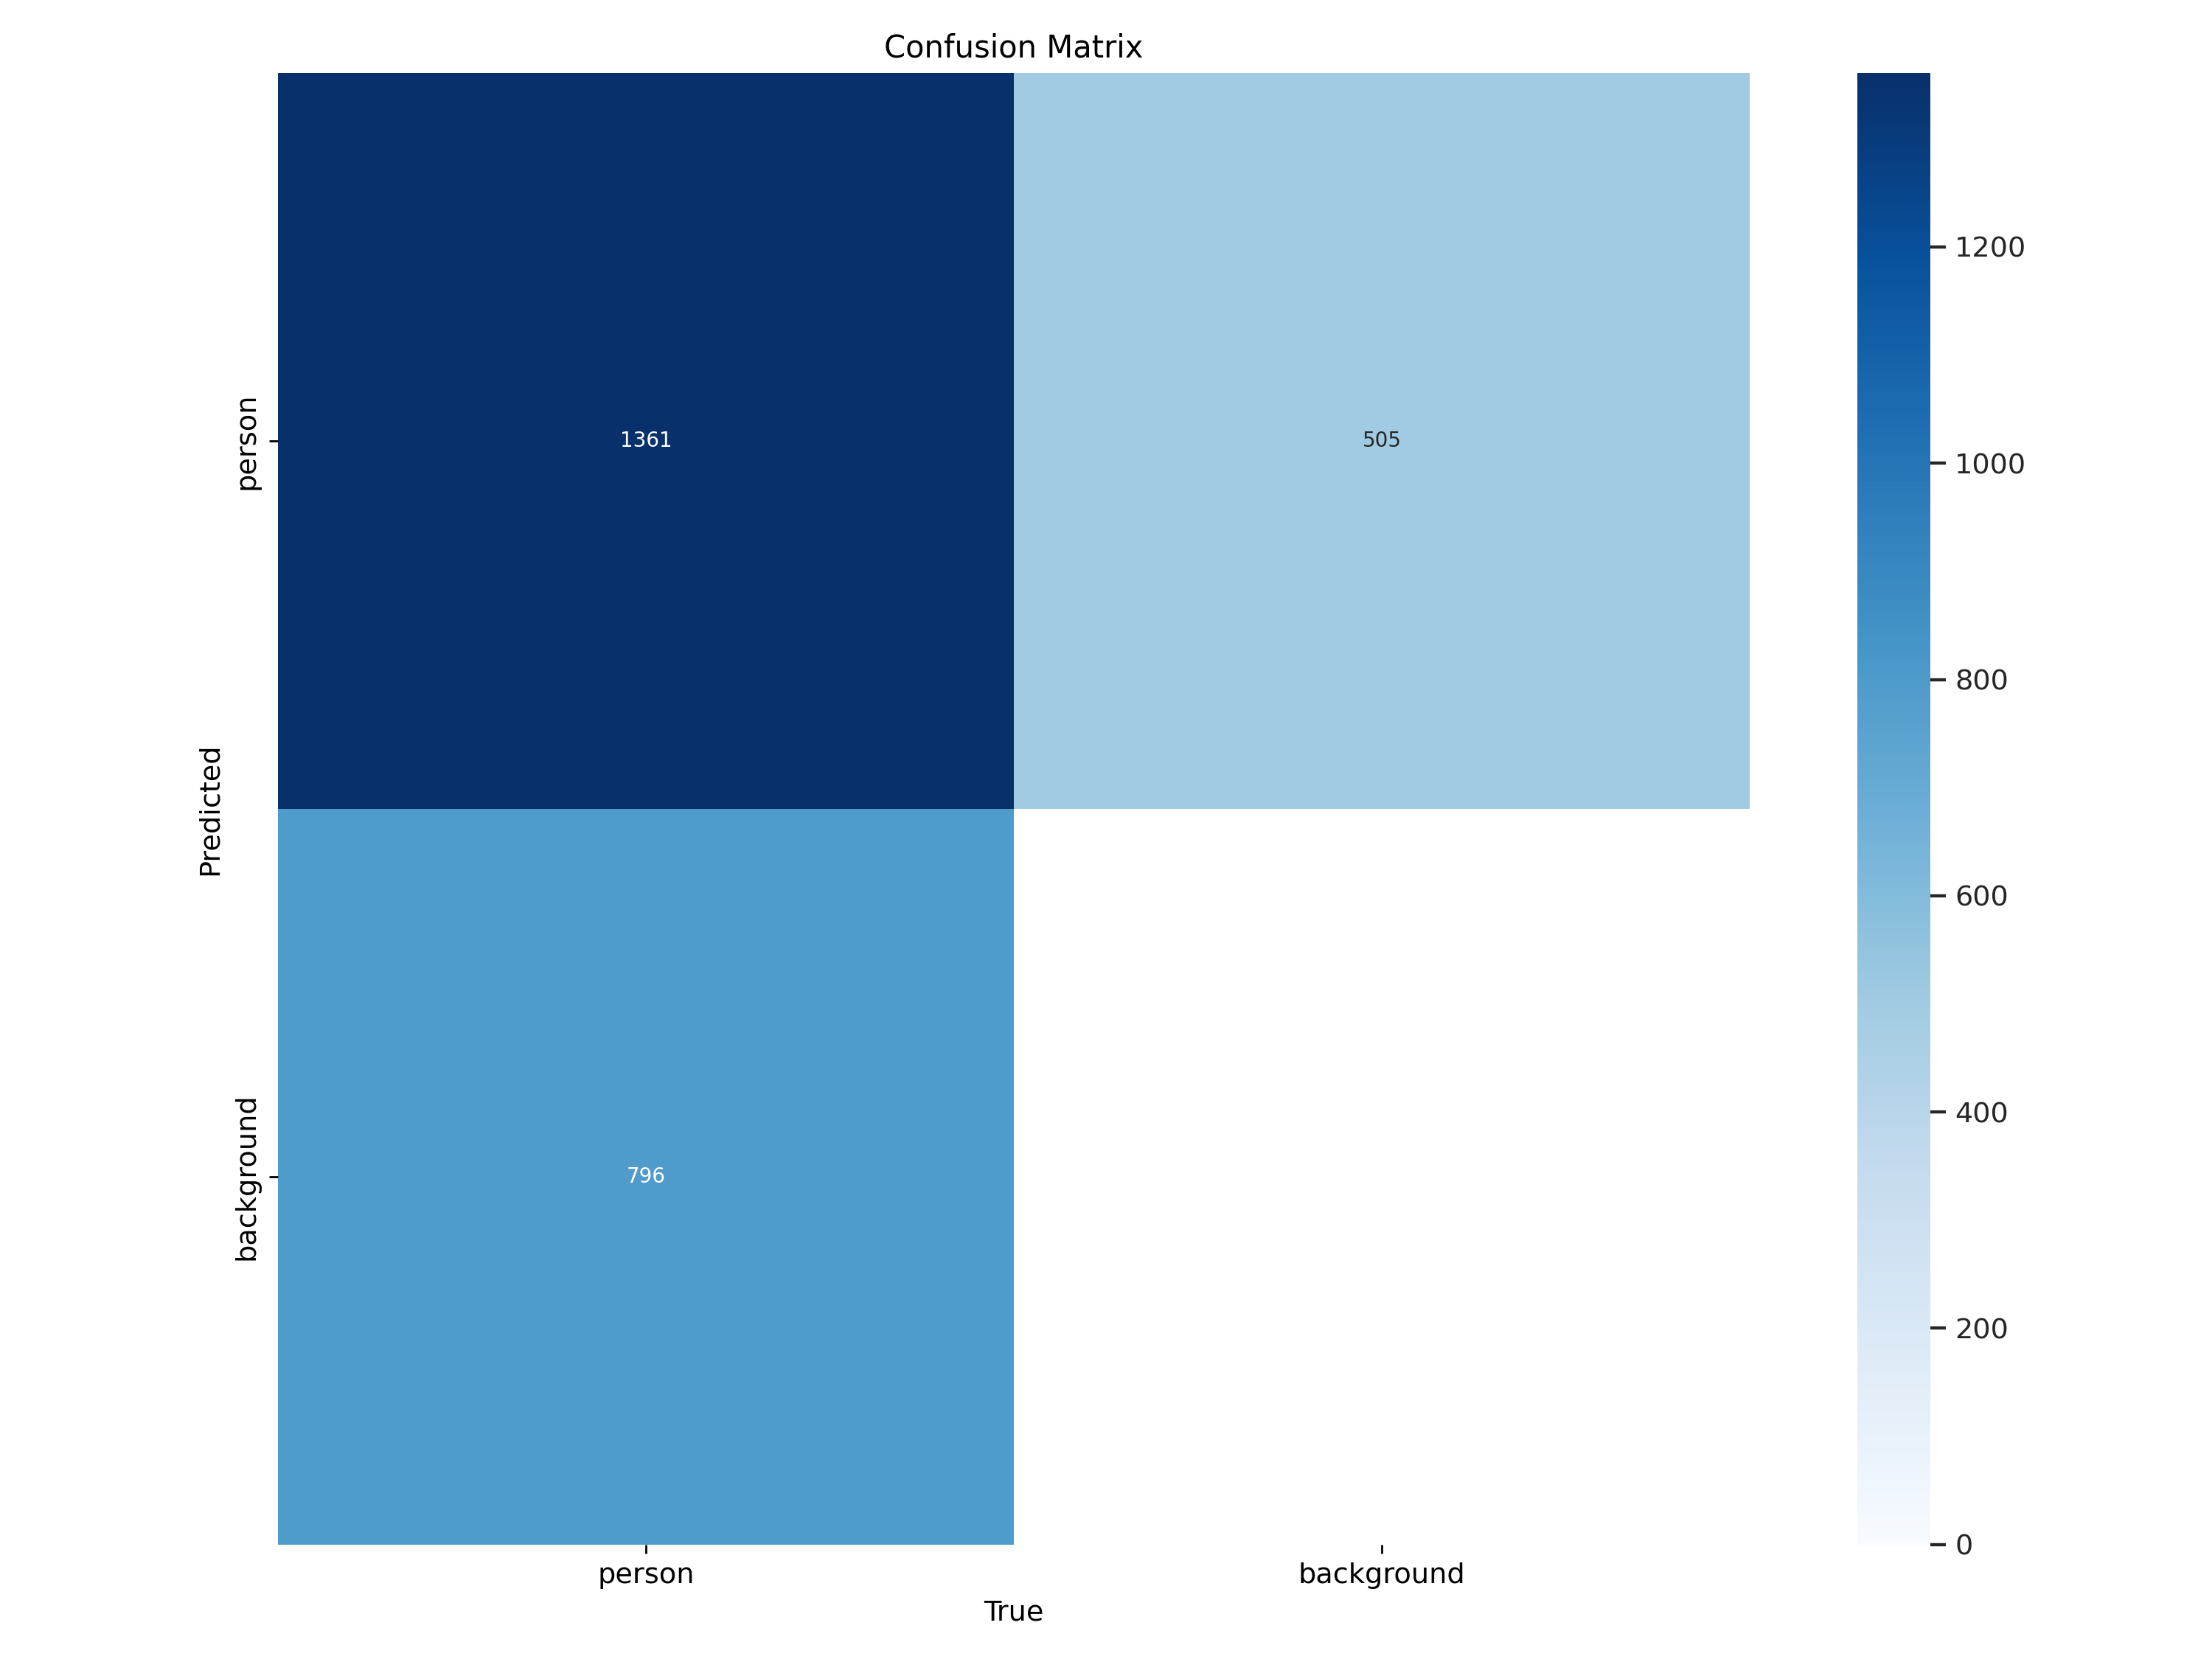

In [ ]:
#Confusion matrix is the chart that shows how the model handles different classes
Image(filename='/content/personDetection-yolov8n/train/confusion_matrix.png', width=900)

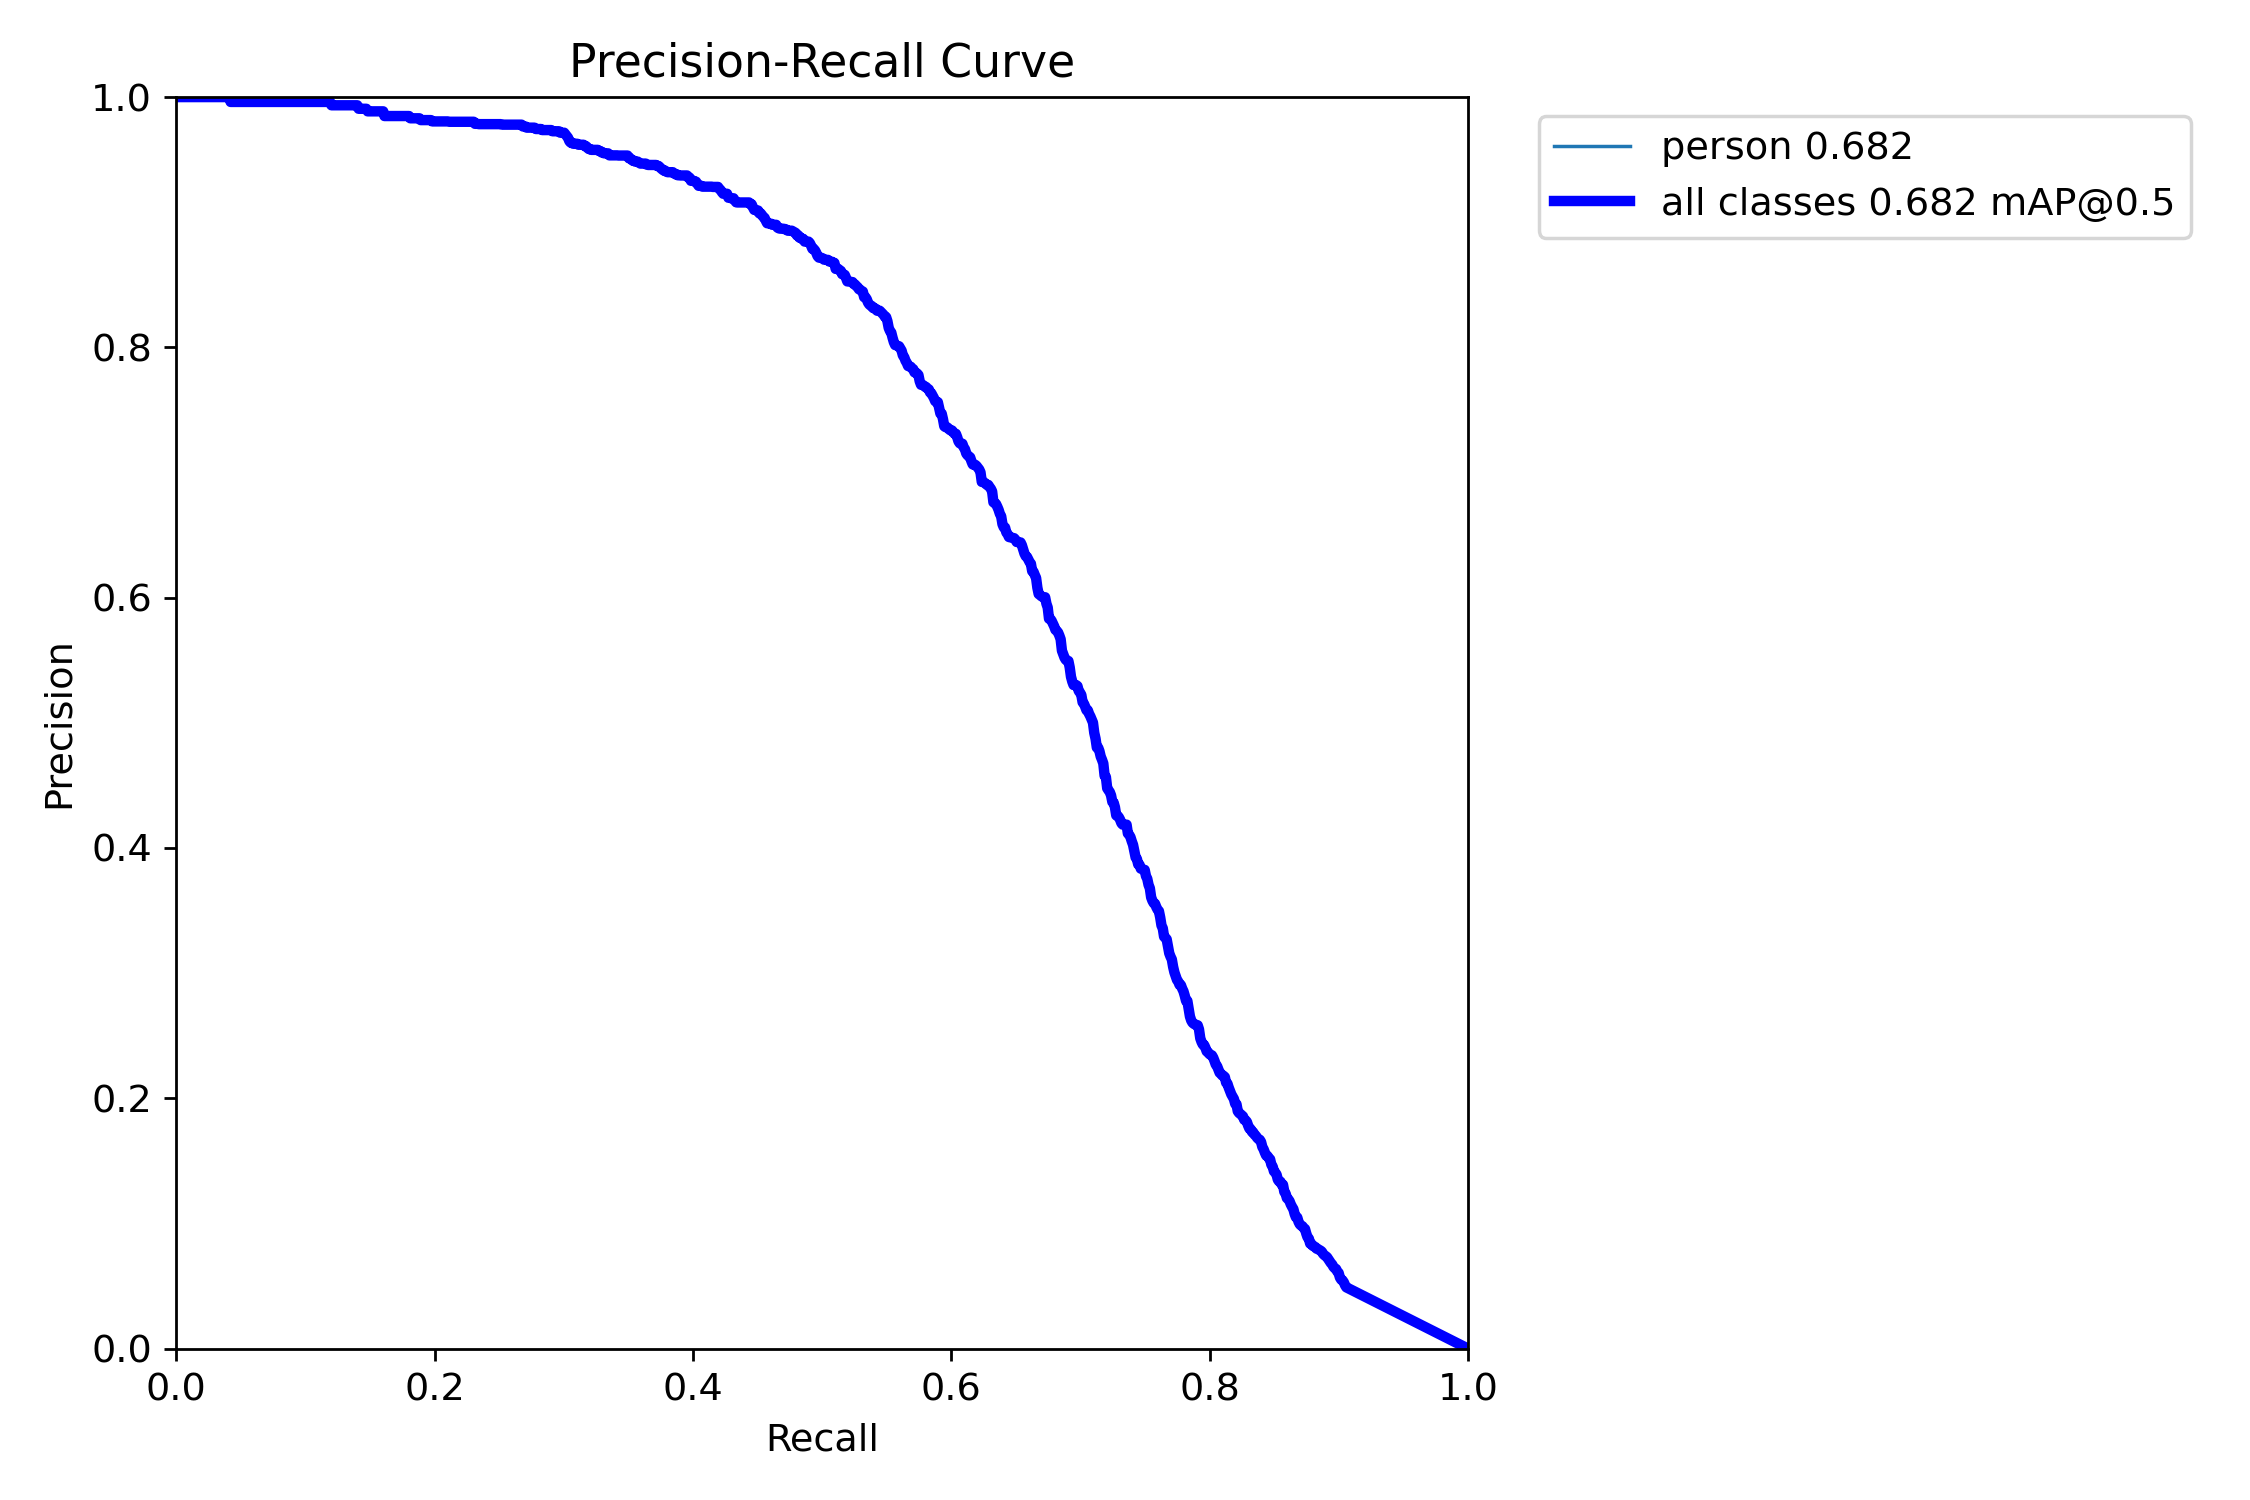

In [ ]:
Image(filename='/content/personDetection-yolov8n/train/PR_curve.png', width=600)

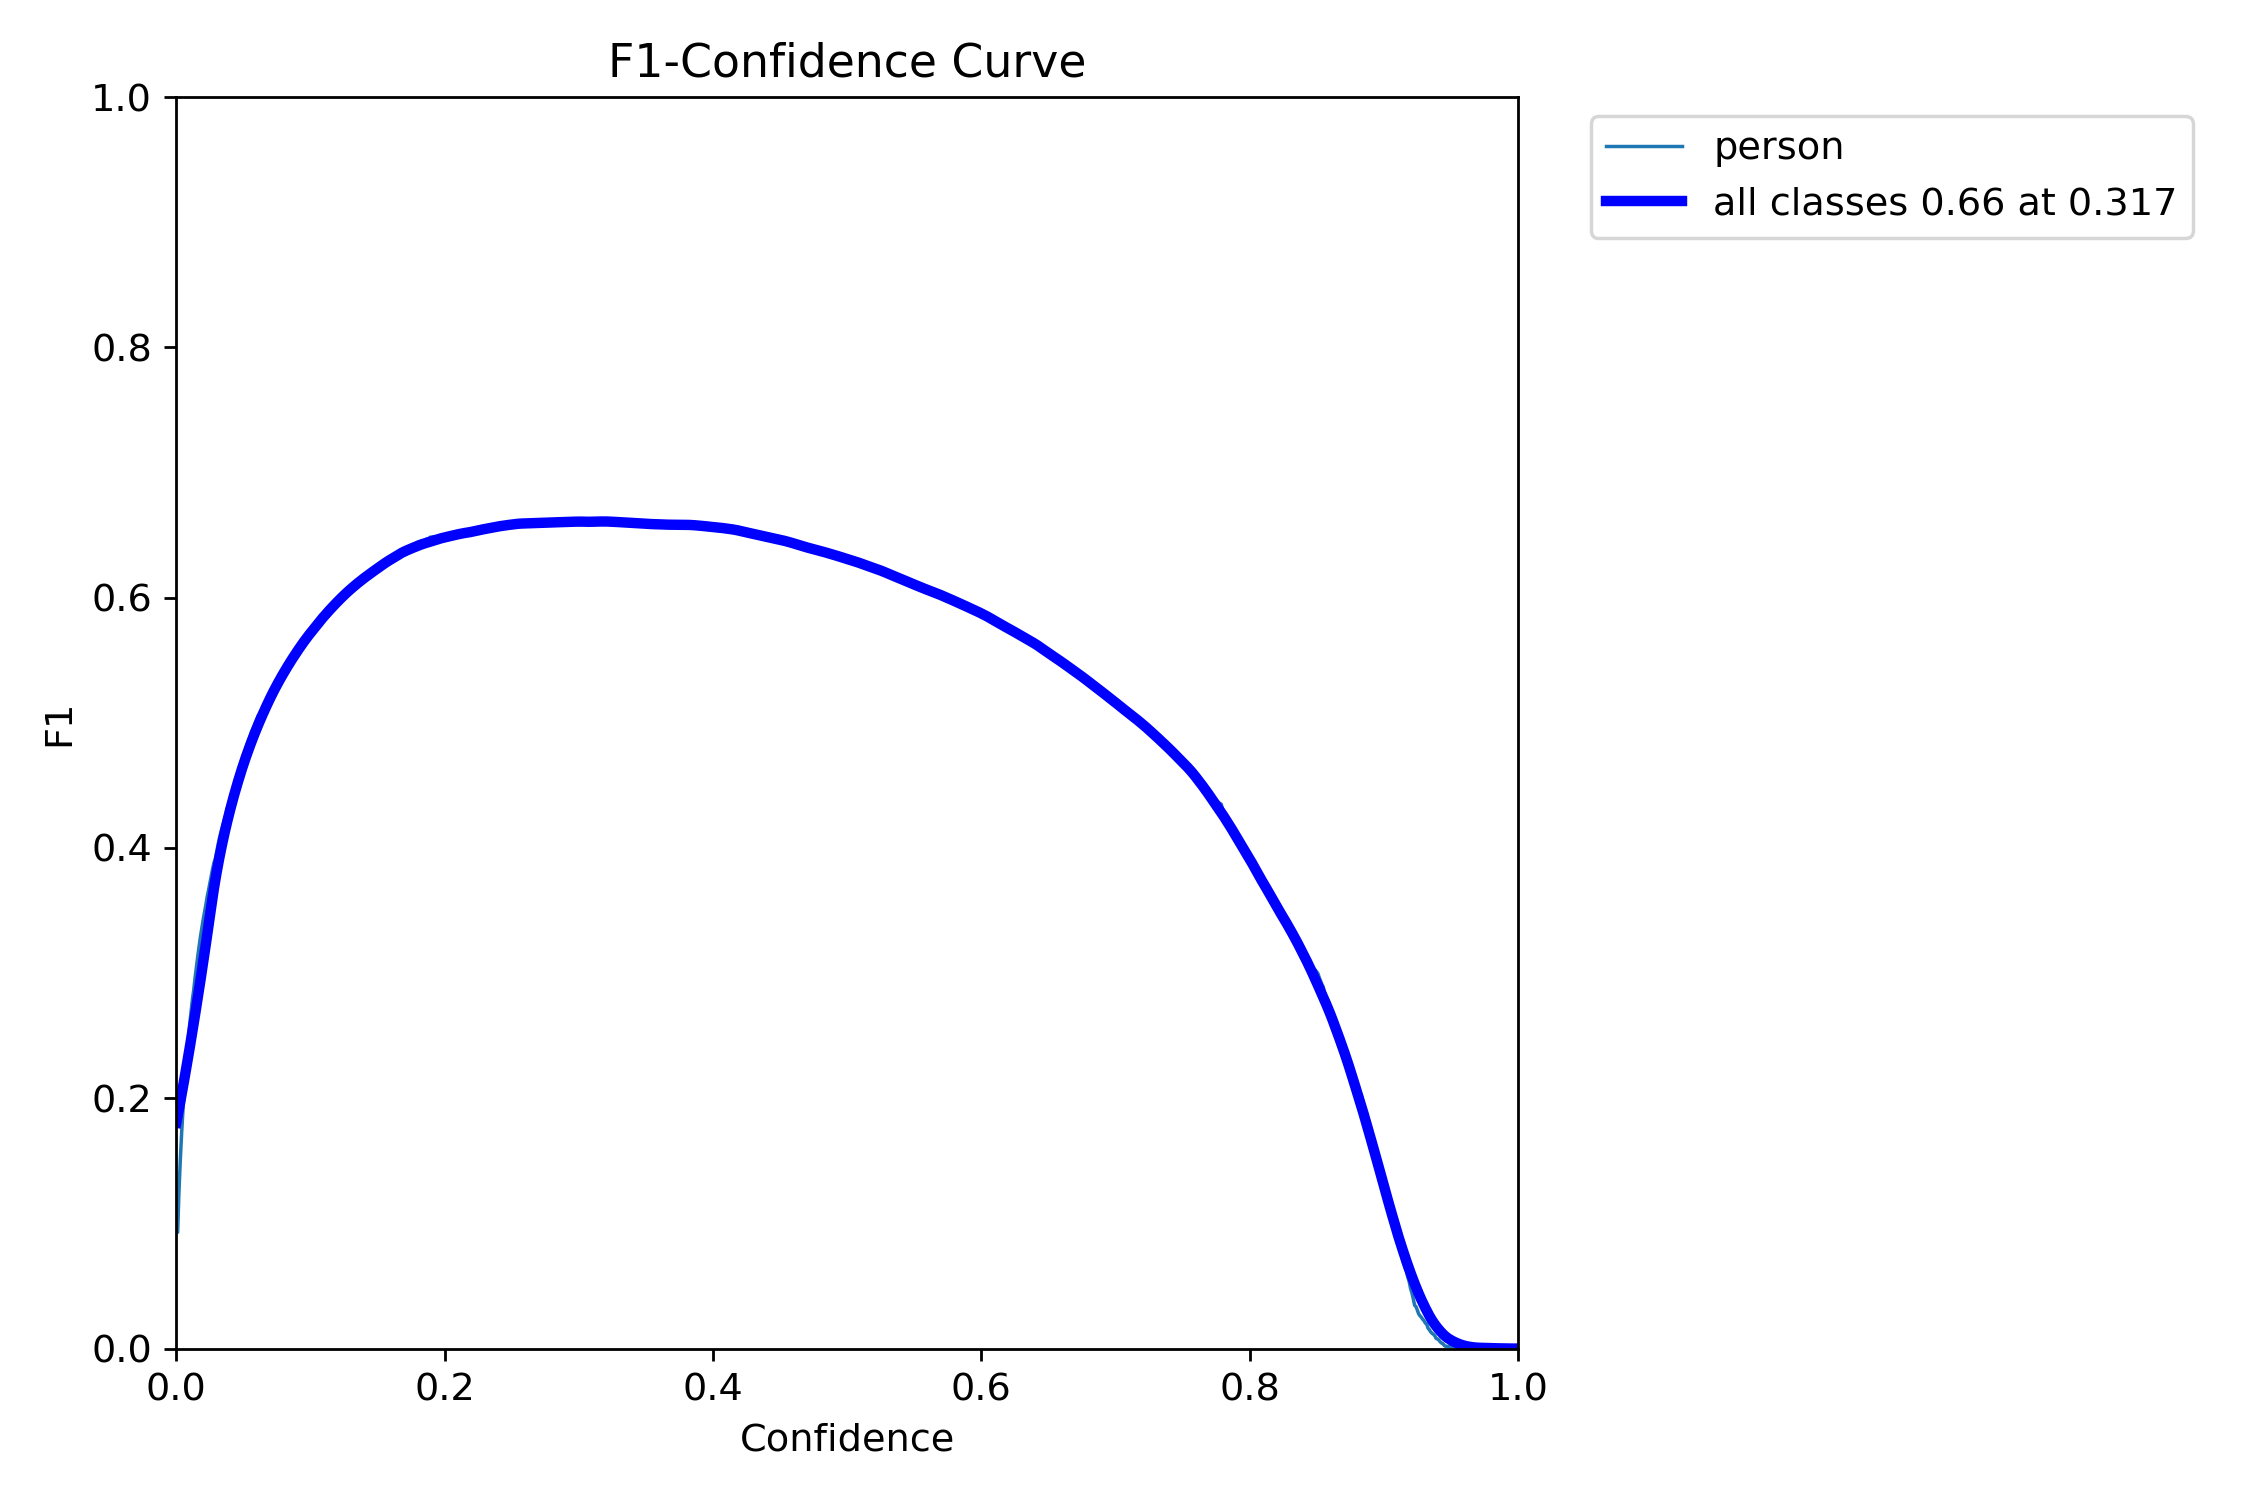

In [ ]:
Image(filename='/content/personDetection-yolov8n/train/F1_curve.png', width=600)

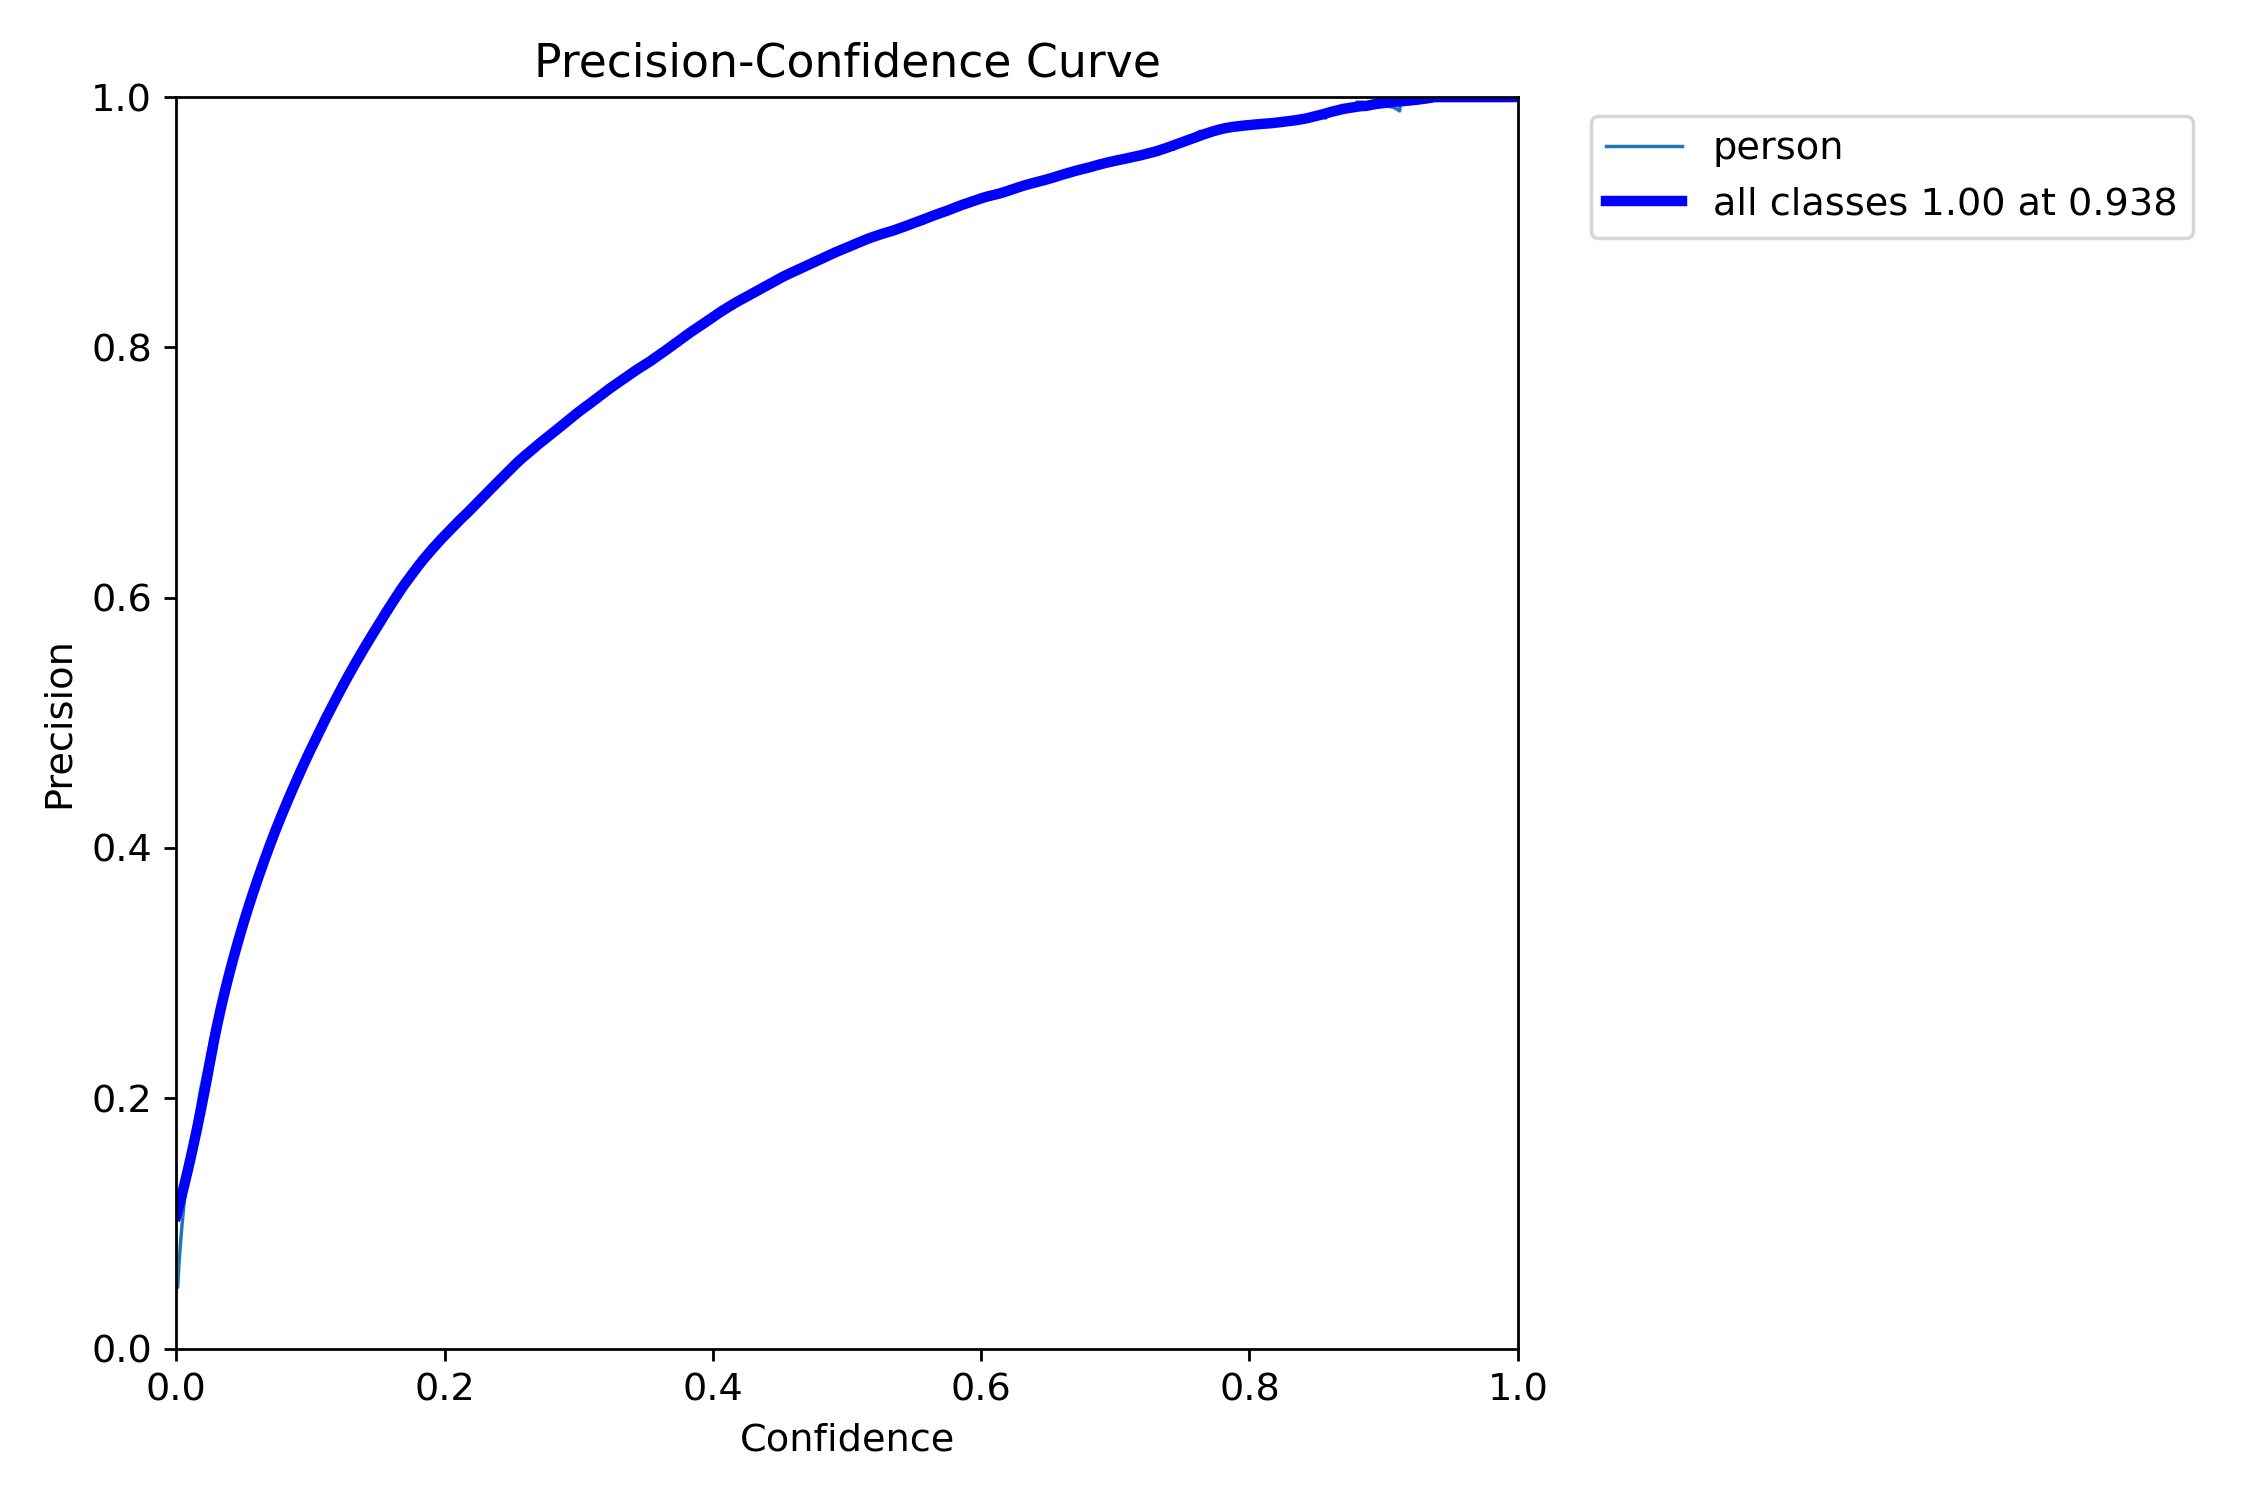

In [ ]:
Image(filename='/content/personDetection-yolov8n/train/P_curve.png', width=600)

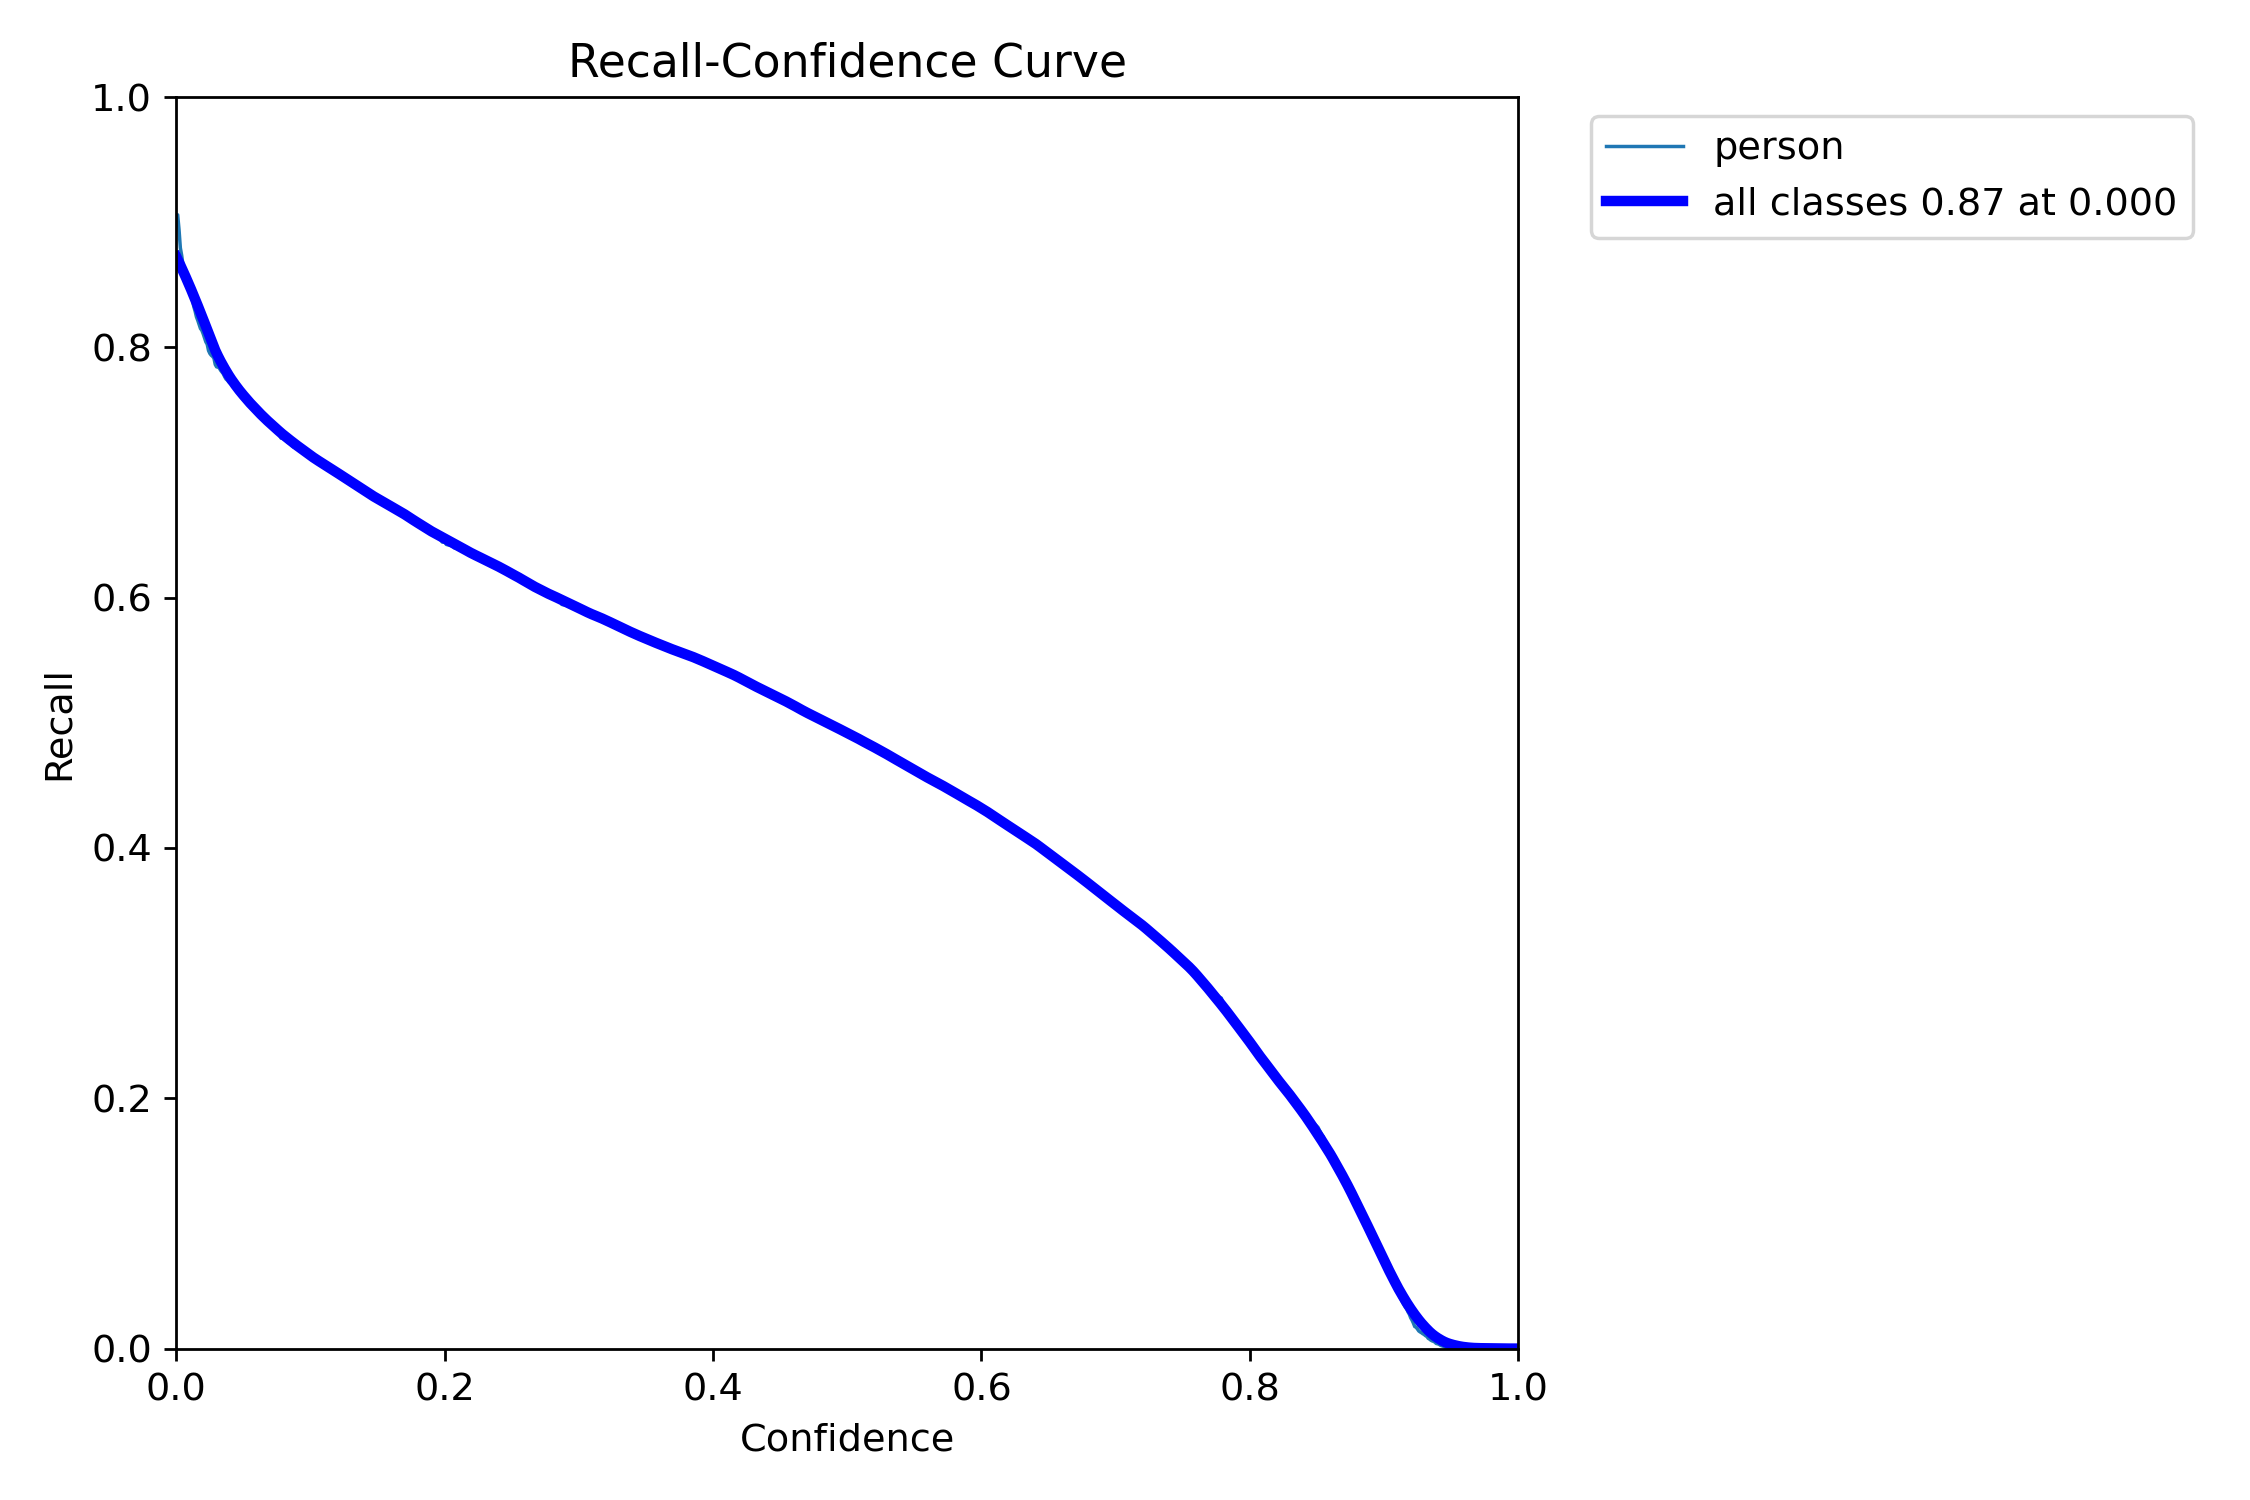

In [ ]:
Image(filename='/content/personDetection-yolov8n/train/R_curve.png', width=600)

#**Training and Validation Loss**

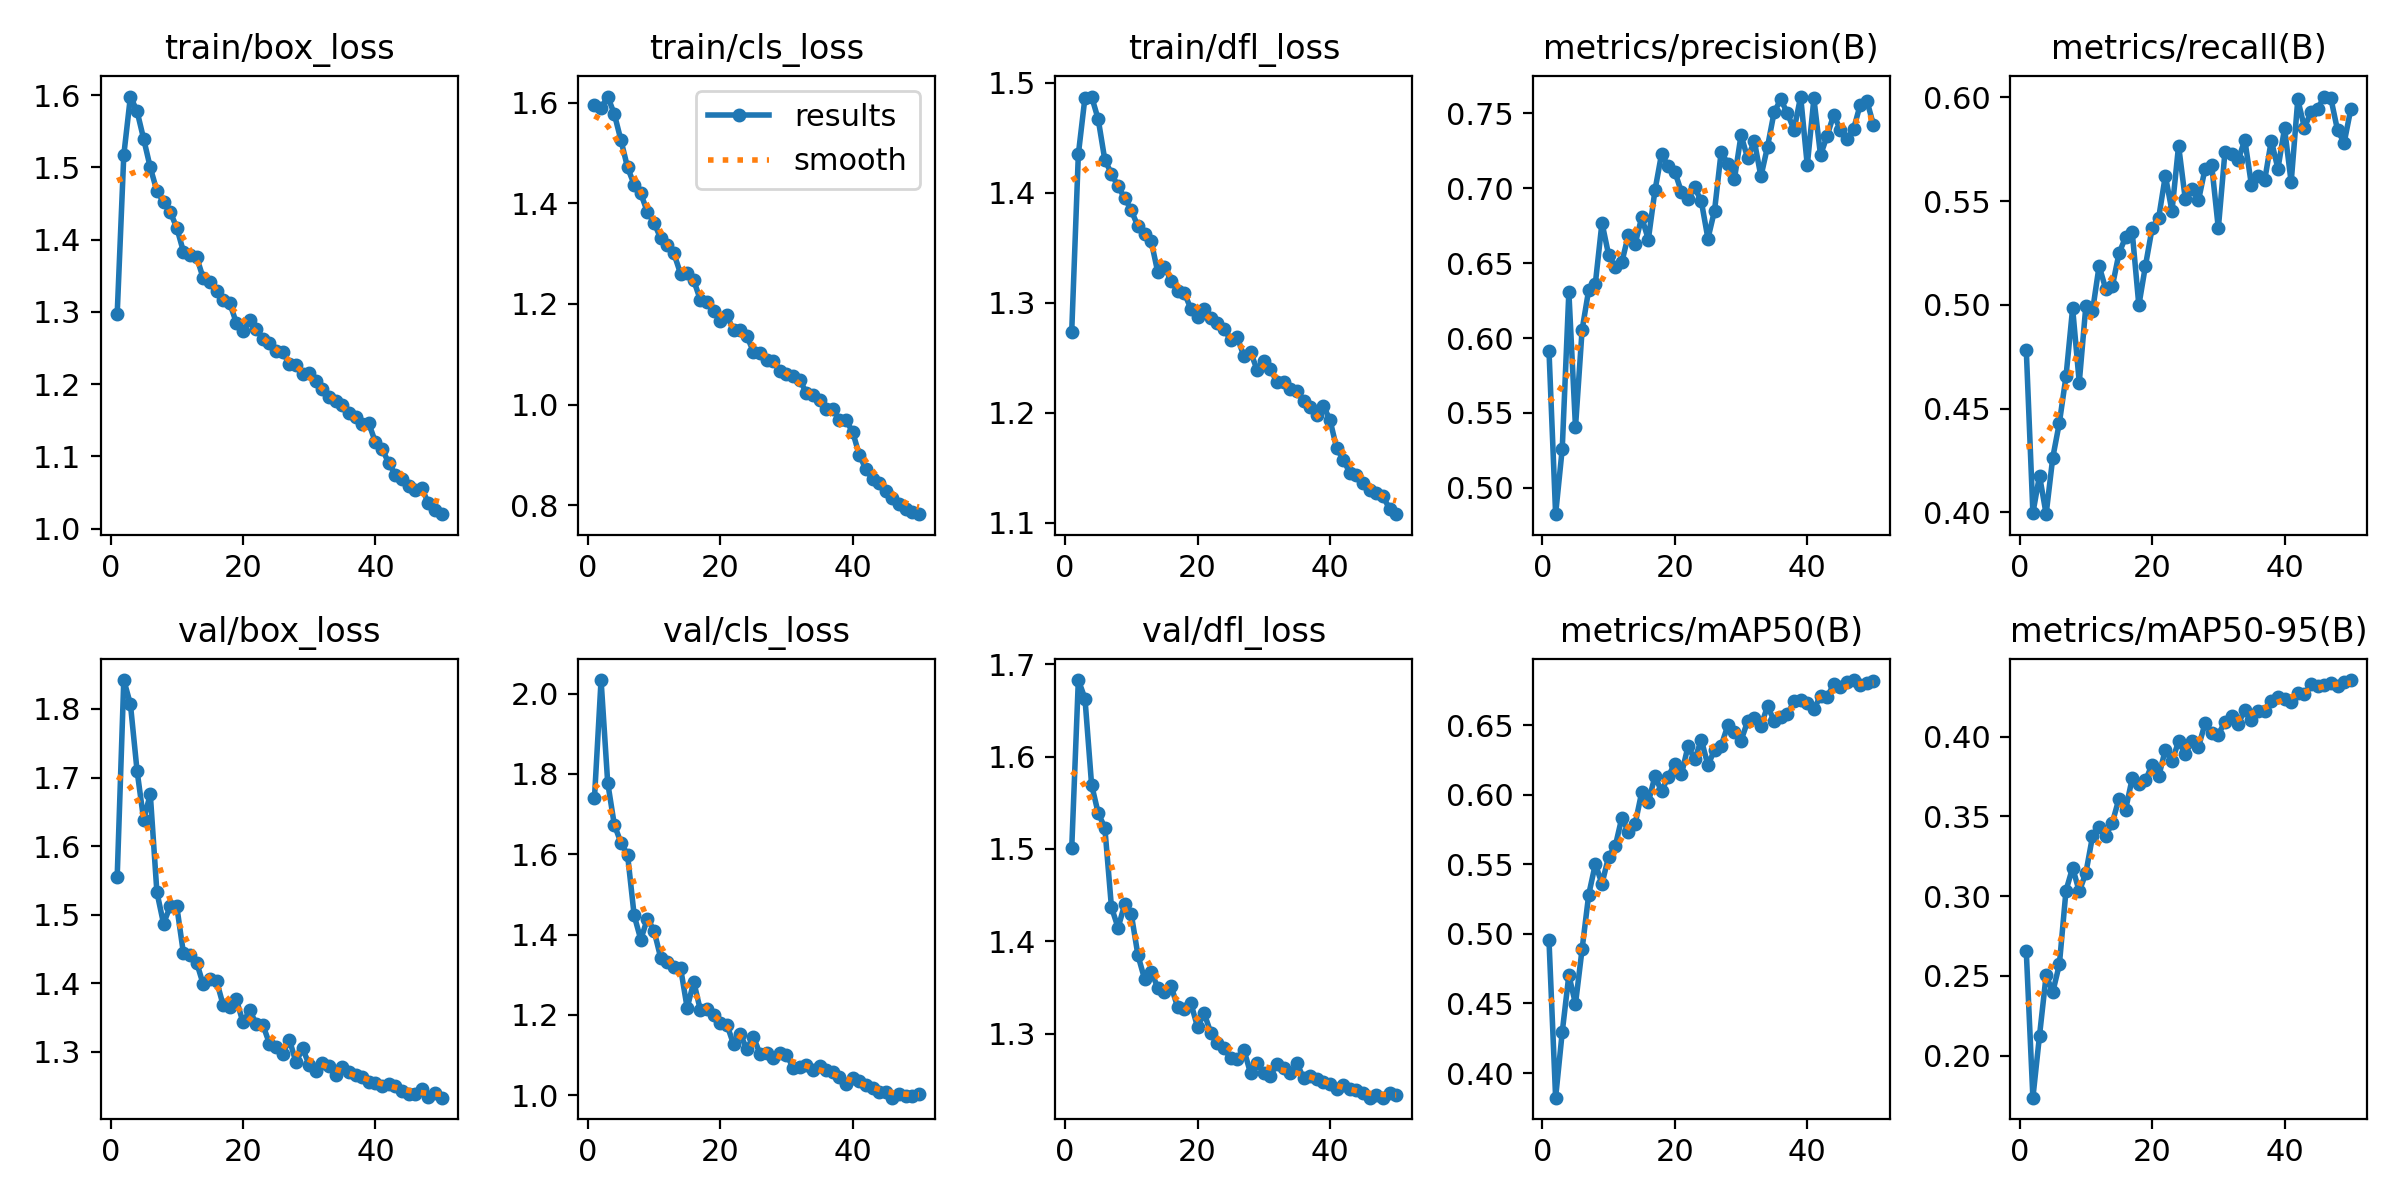

In [ ]:
# graph of the training and validation loss

Image(filename='/content/personDetection-yolov8n/train/results.png', width=600)

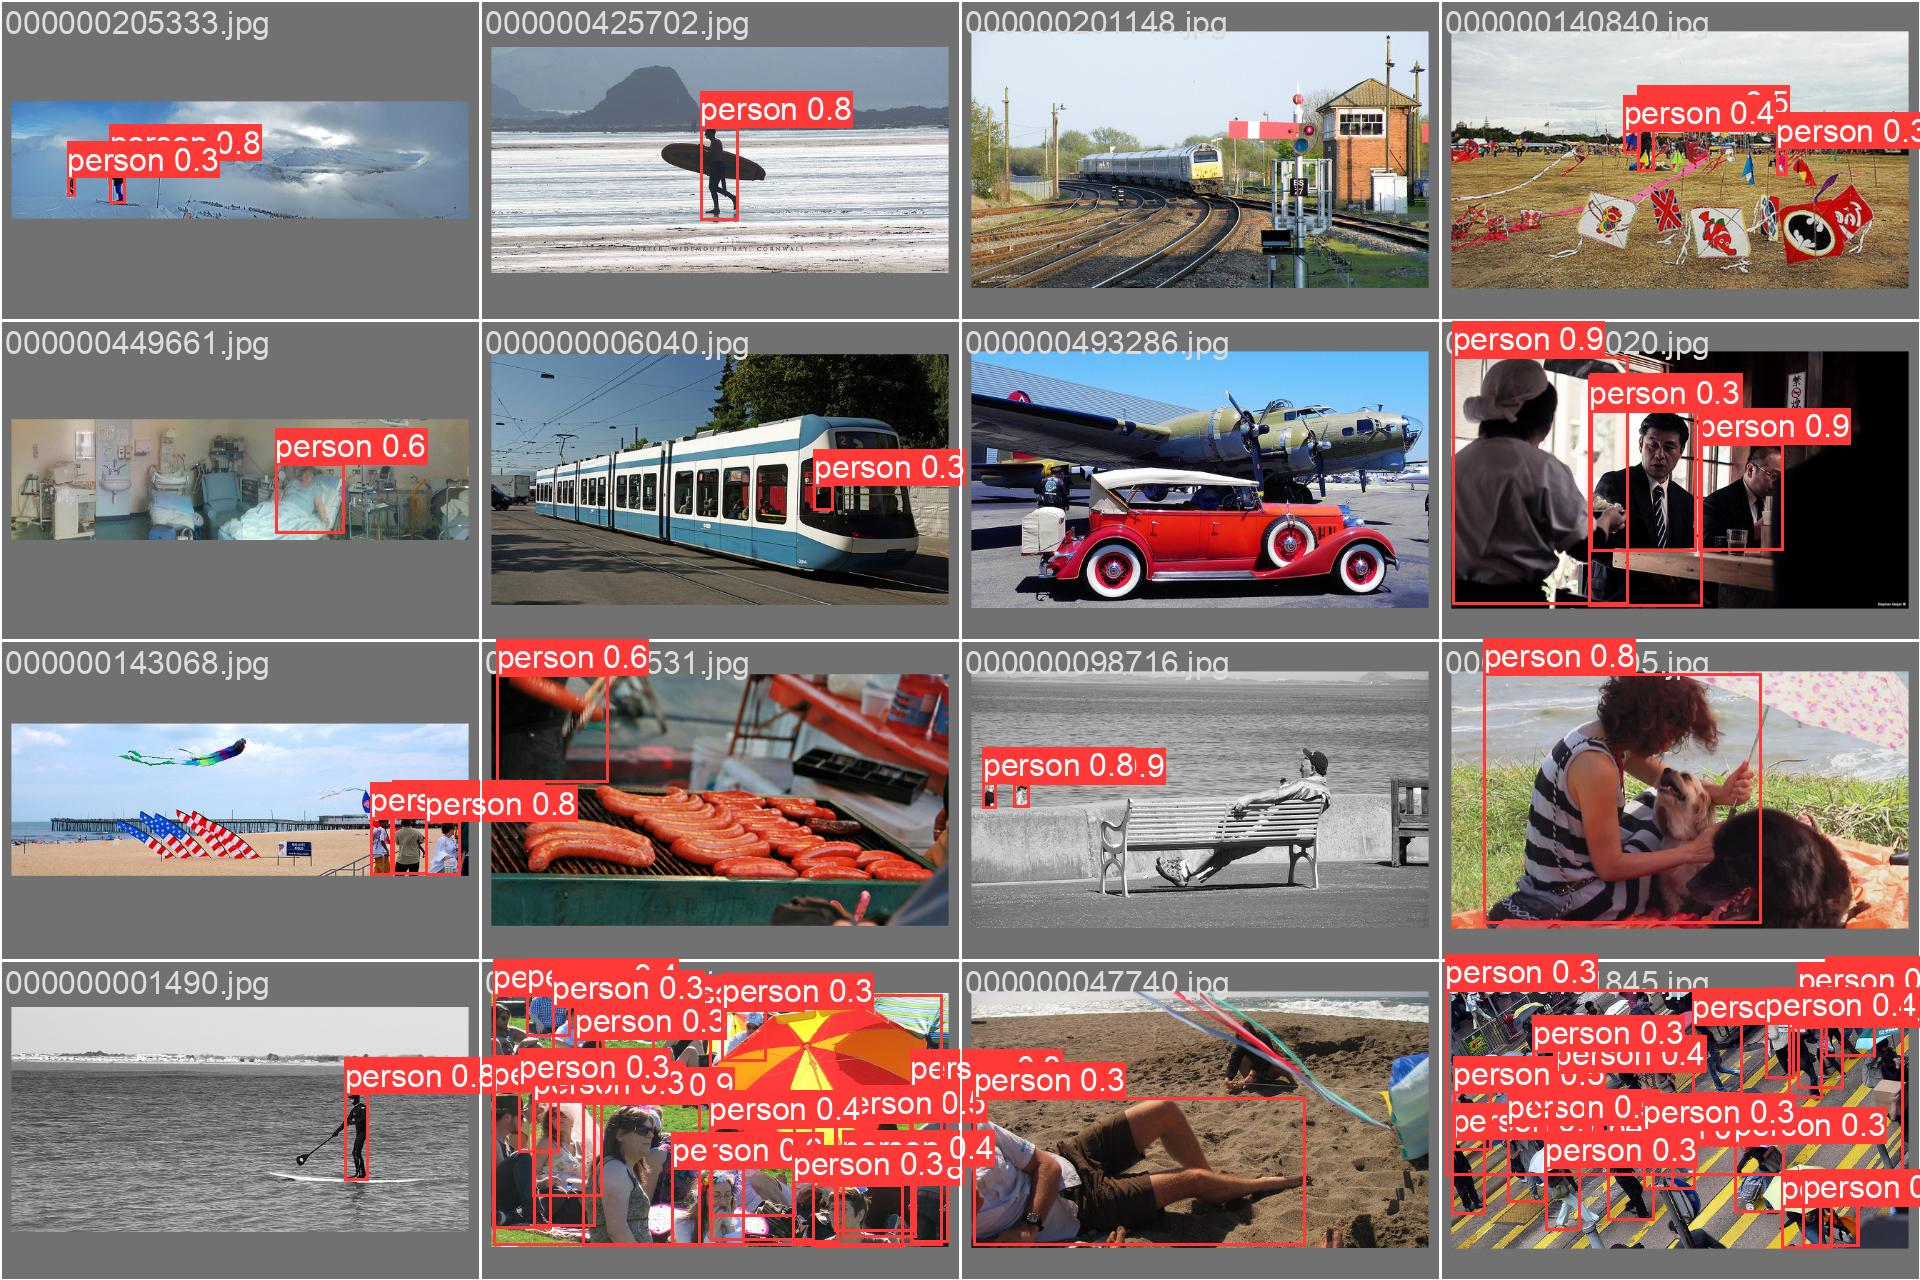

In [ ]:
#Model Prediction on validation batch
Image(filename='/content/personDetection-yolov8n/train/val_batch0_pred.jpg', width=600)

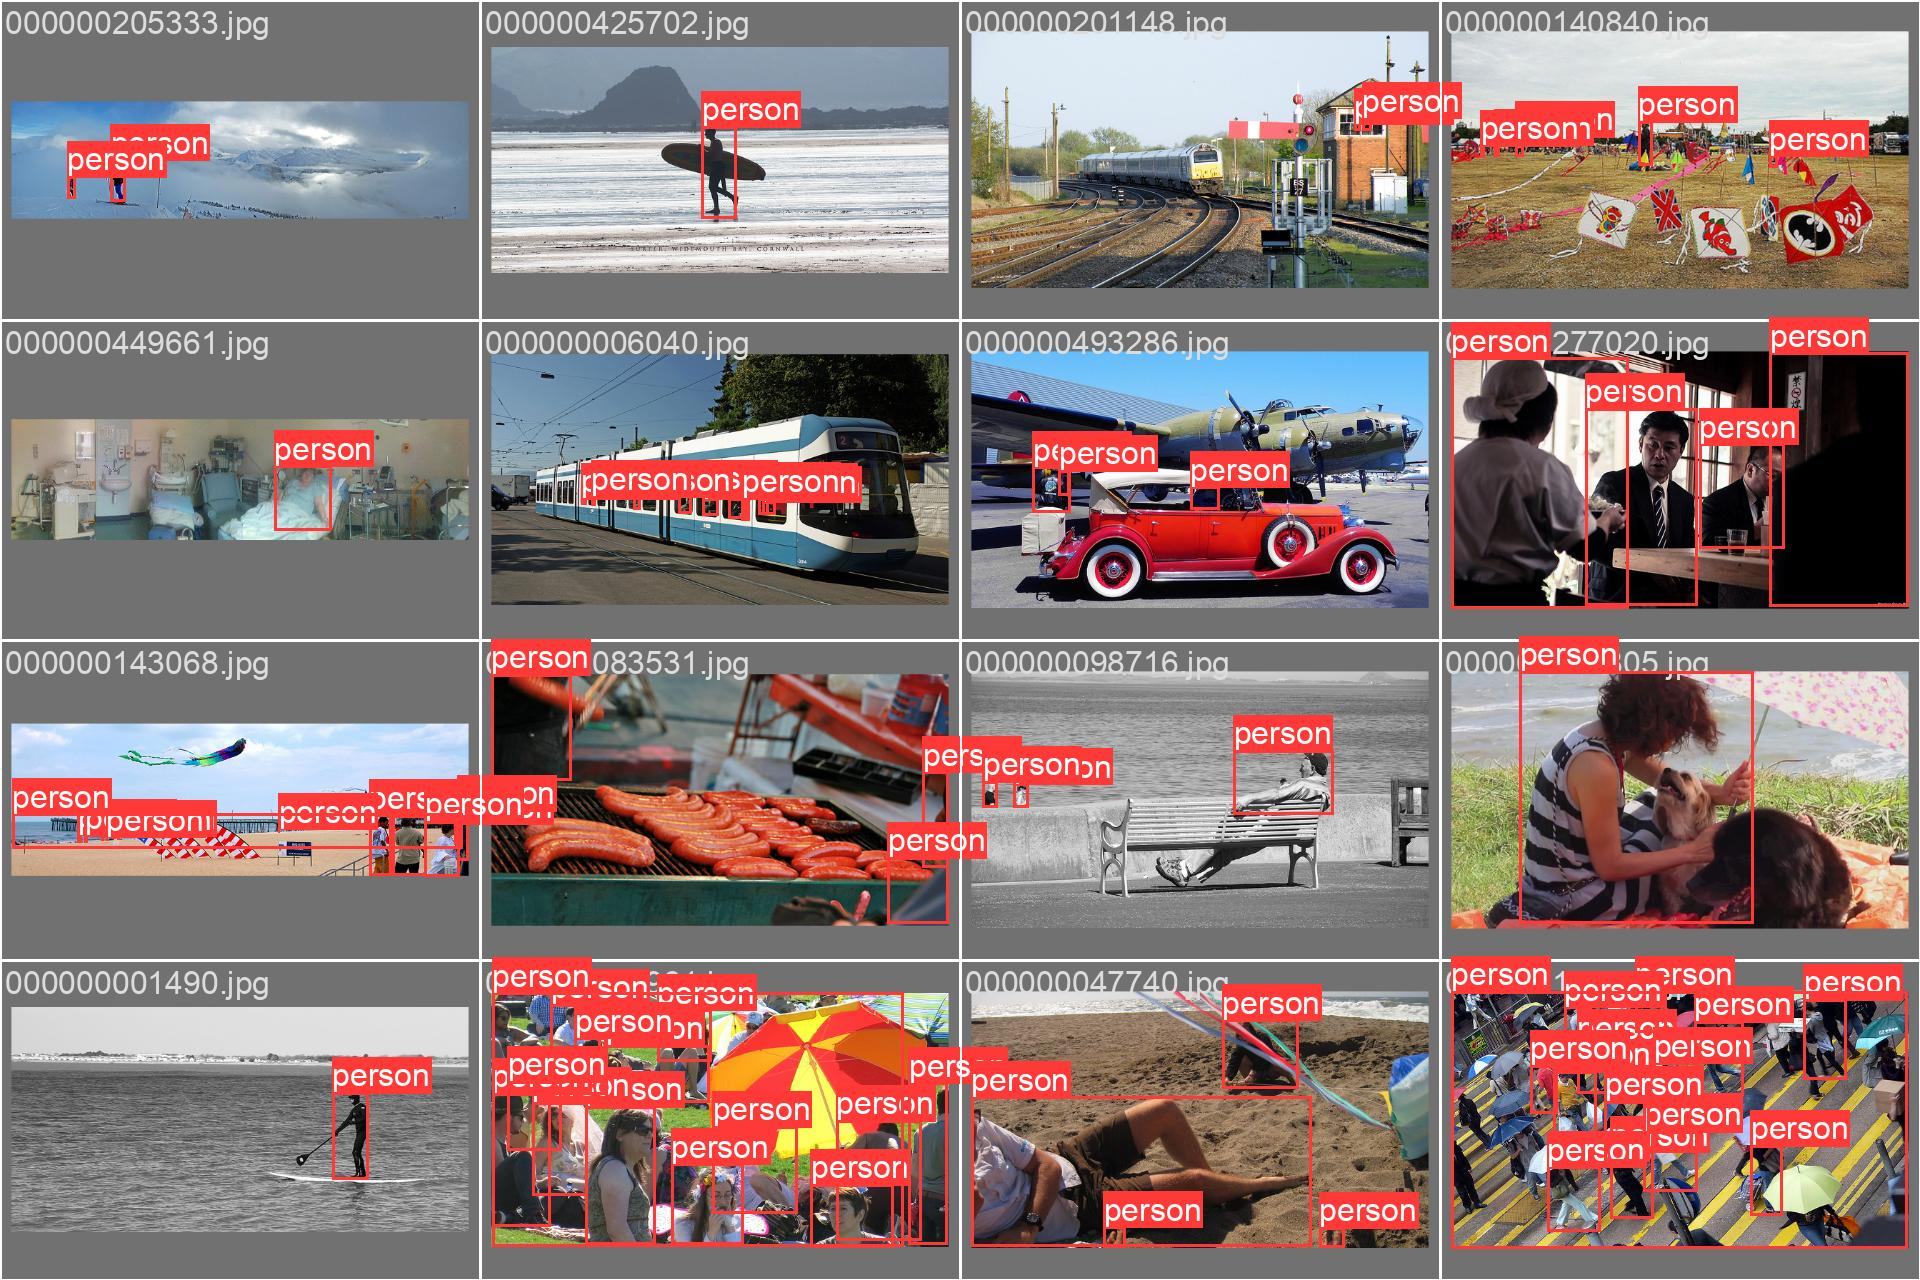

In [ ]:
Image(filename='/content/personDetection-yolov8n/train/val_batch0_labels.jpg', width=600)

#**Confusion matrix (test)**

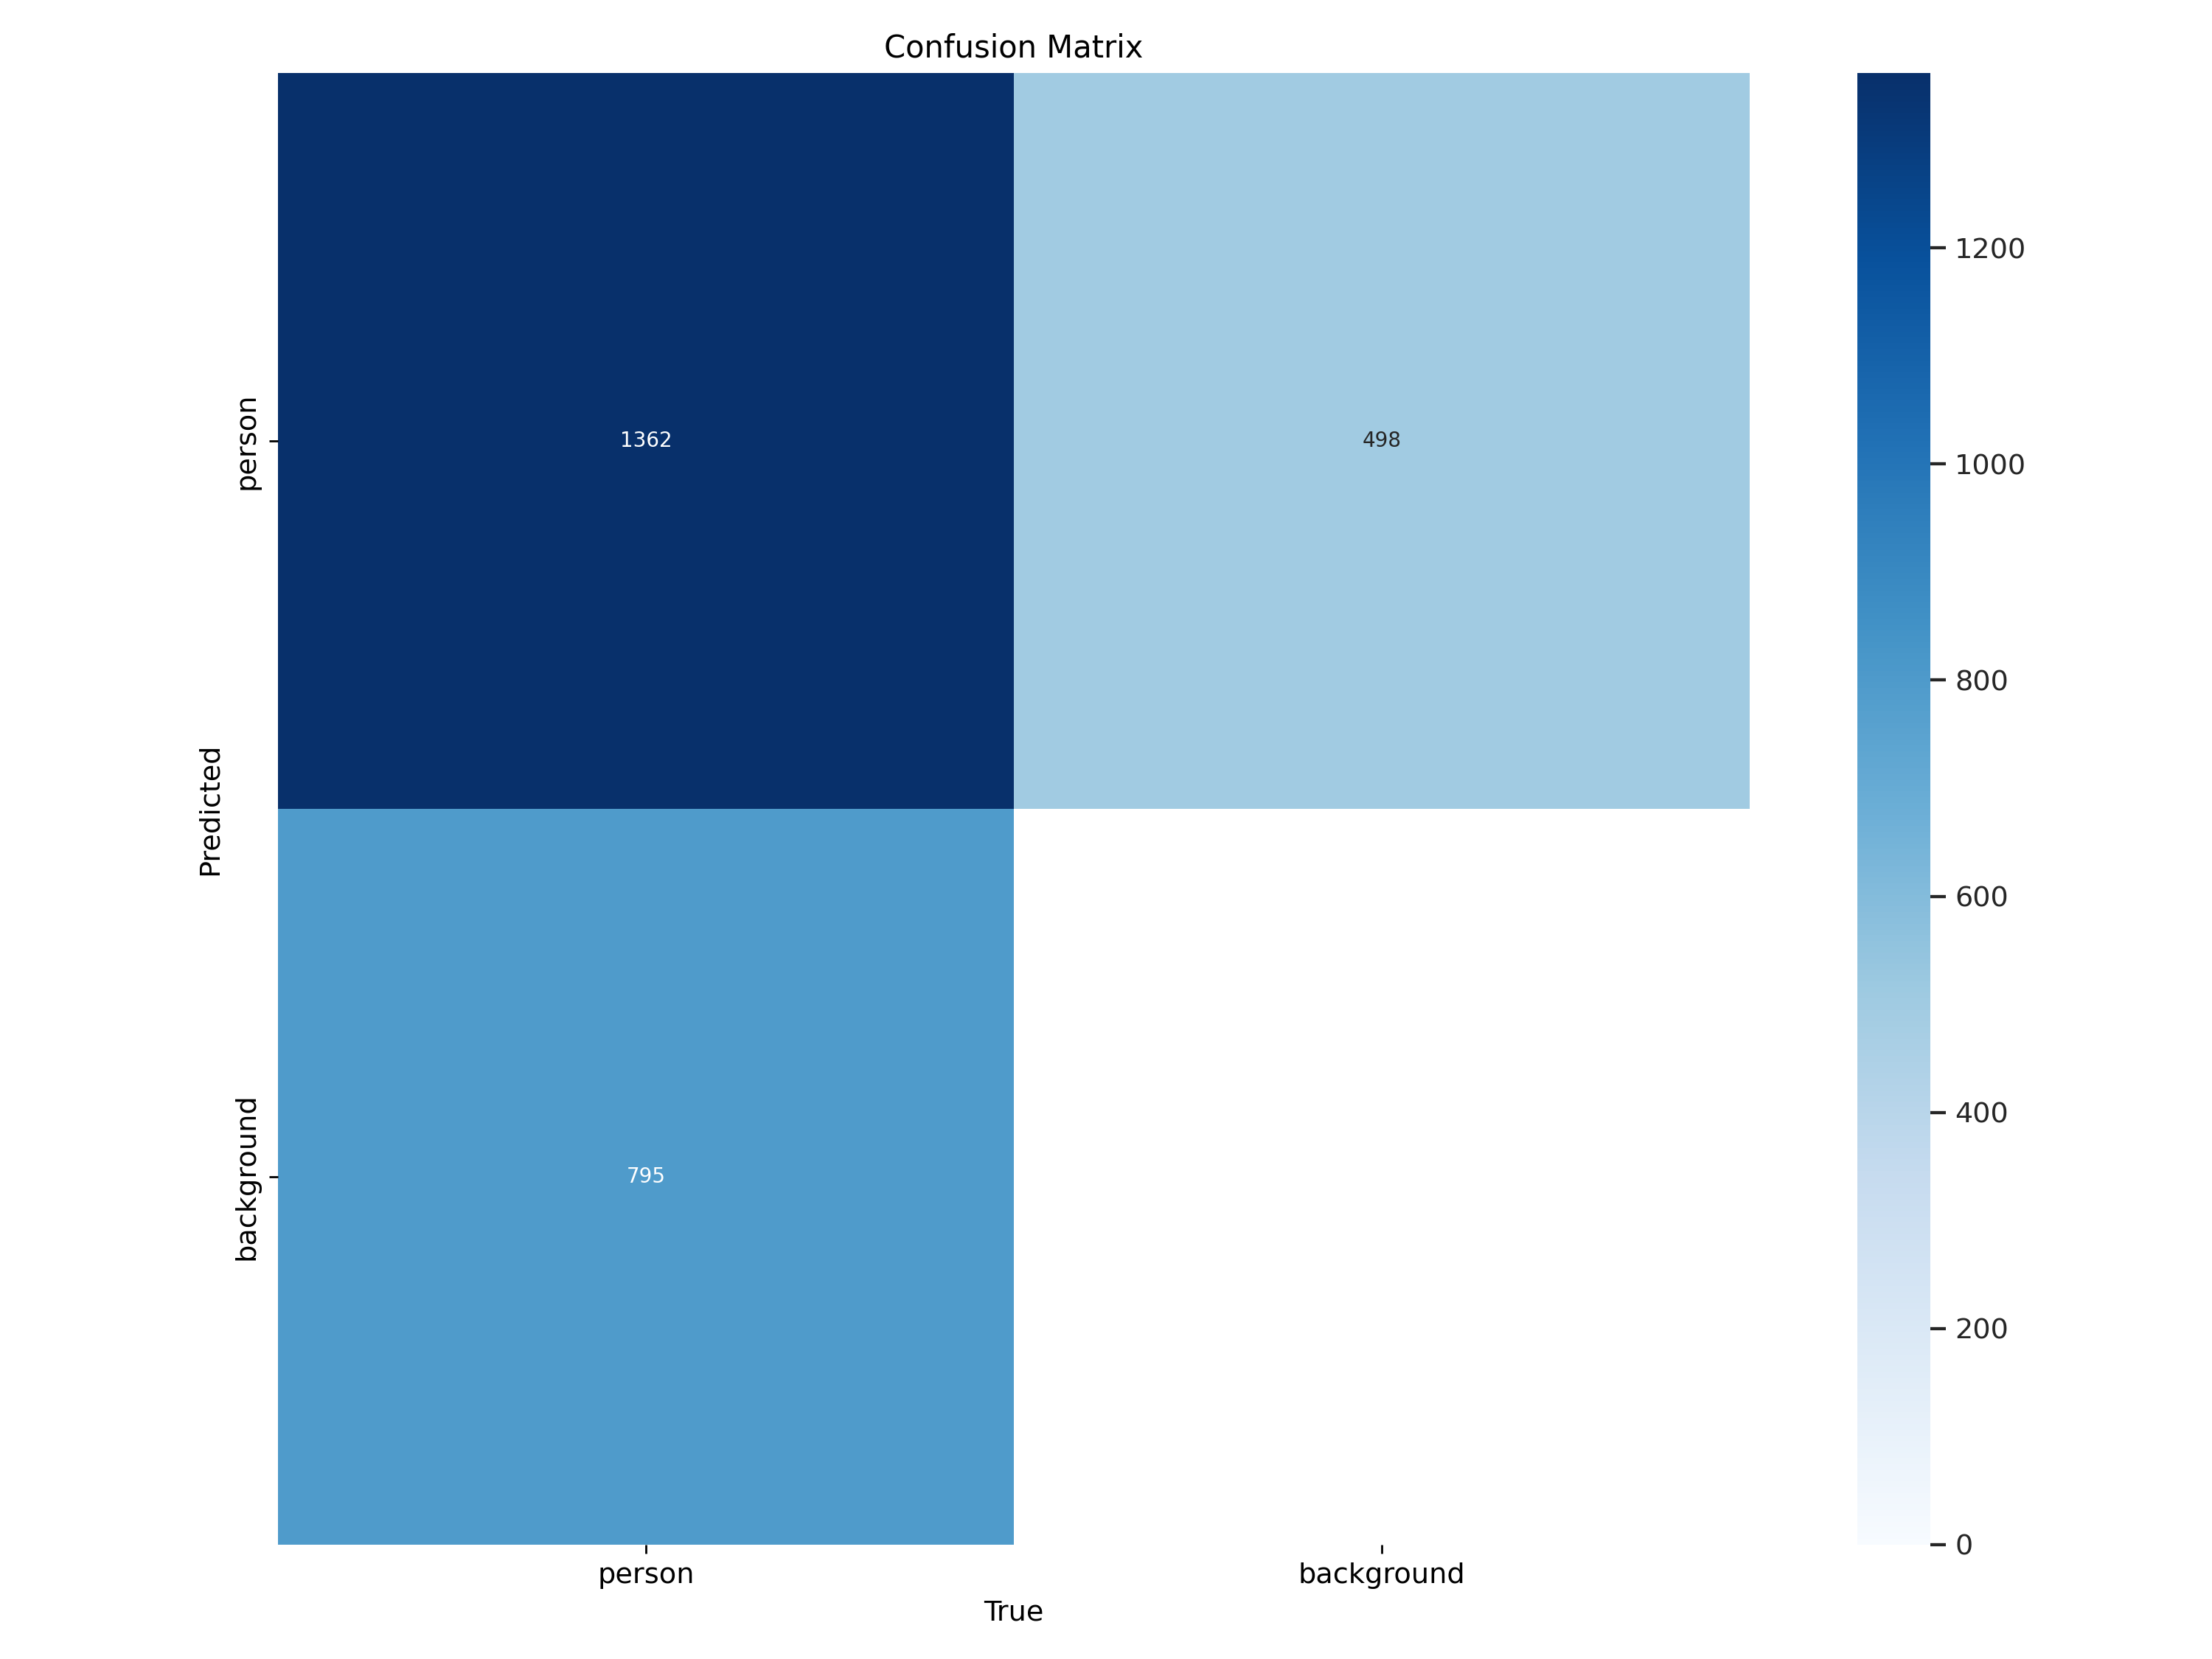

In [ ]:
#Confusion matrix is the chart that shows how the model handles different classes
Image(filename='/content/personDetection-yolov8n/train2/confusion_matrix.png', width=900)

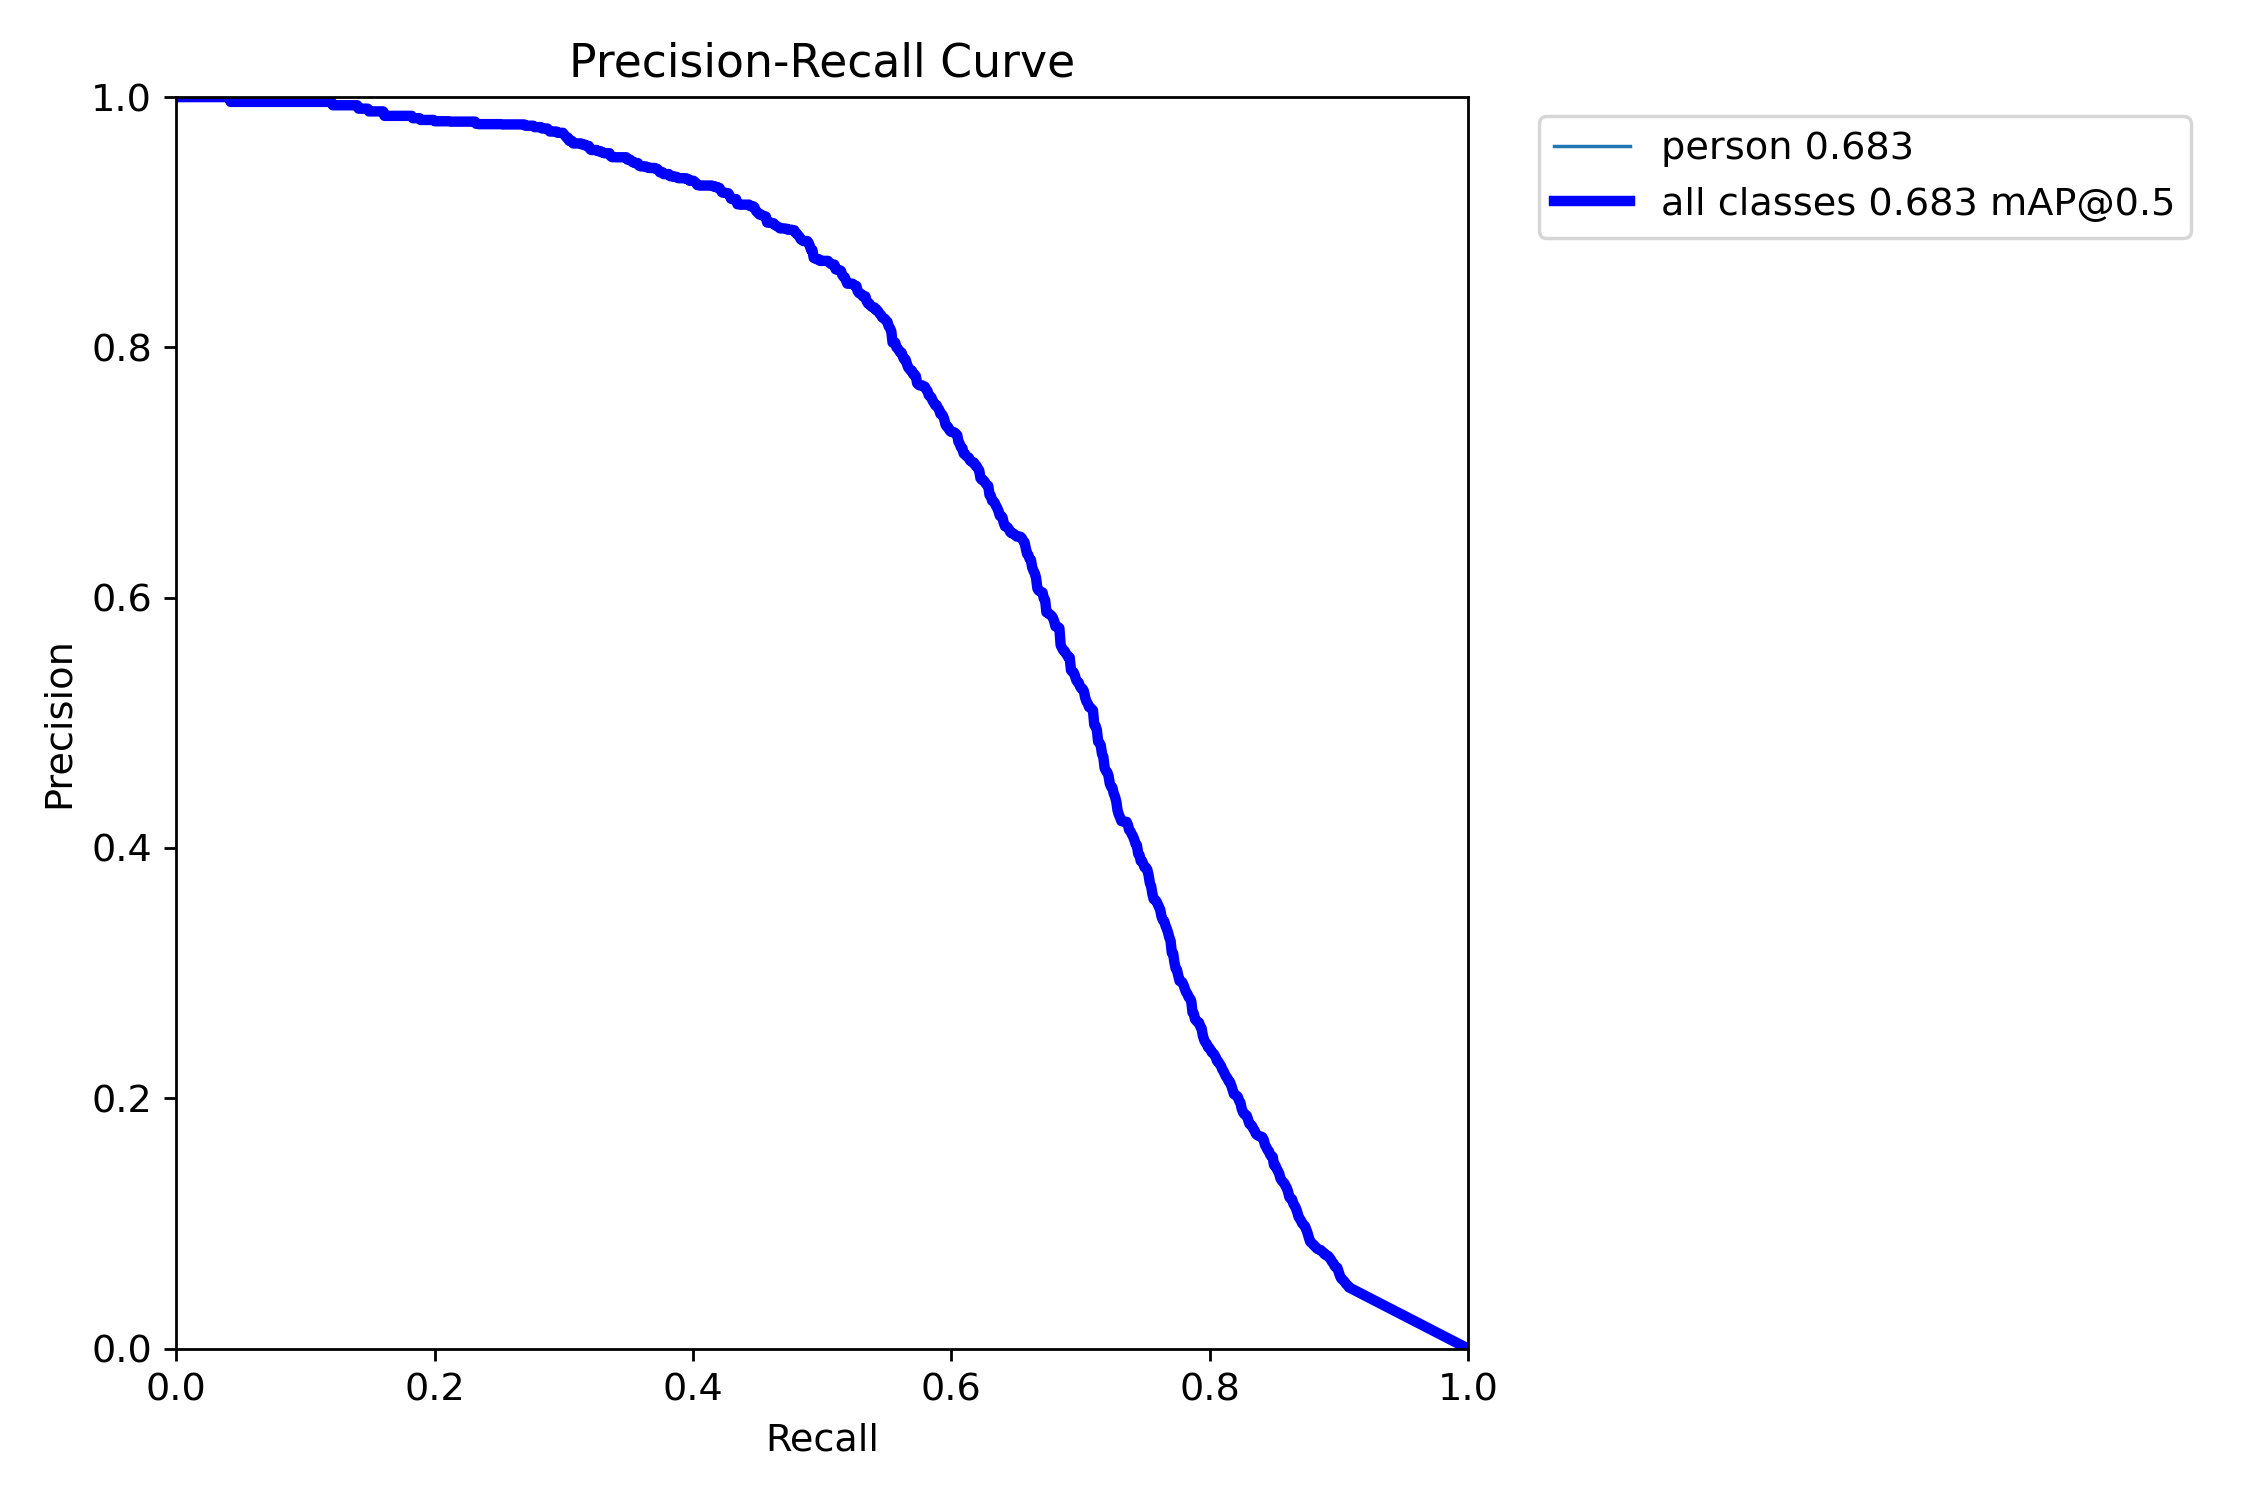

In [ ]:
Image(filename='/content/personDetection-yolov8n/train2/PR_curve.png', width=600)

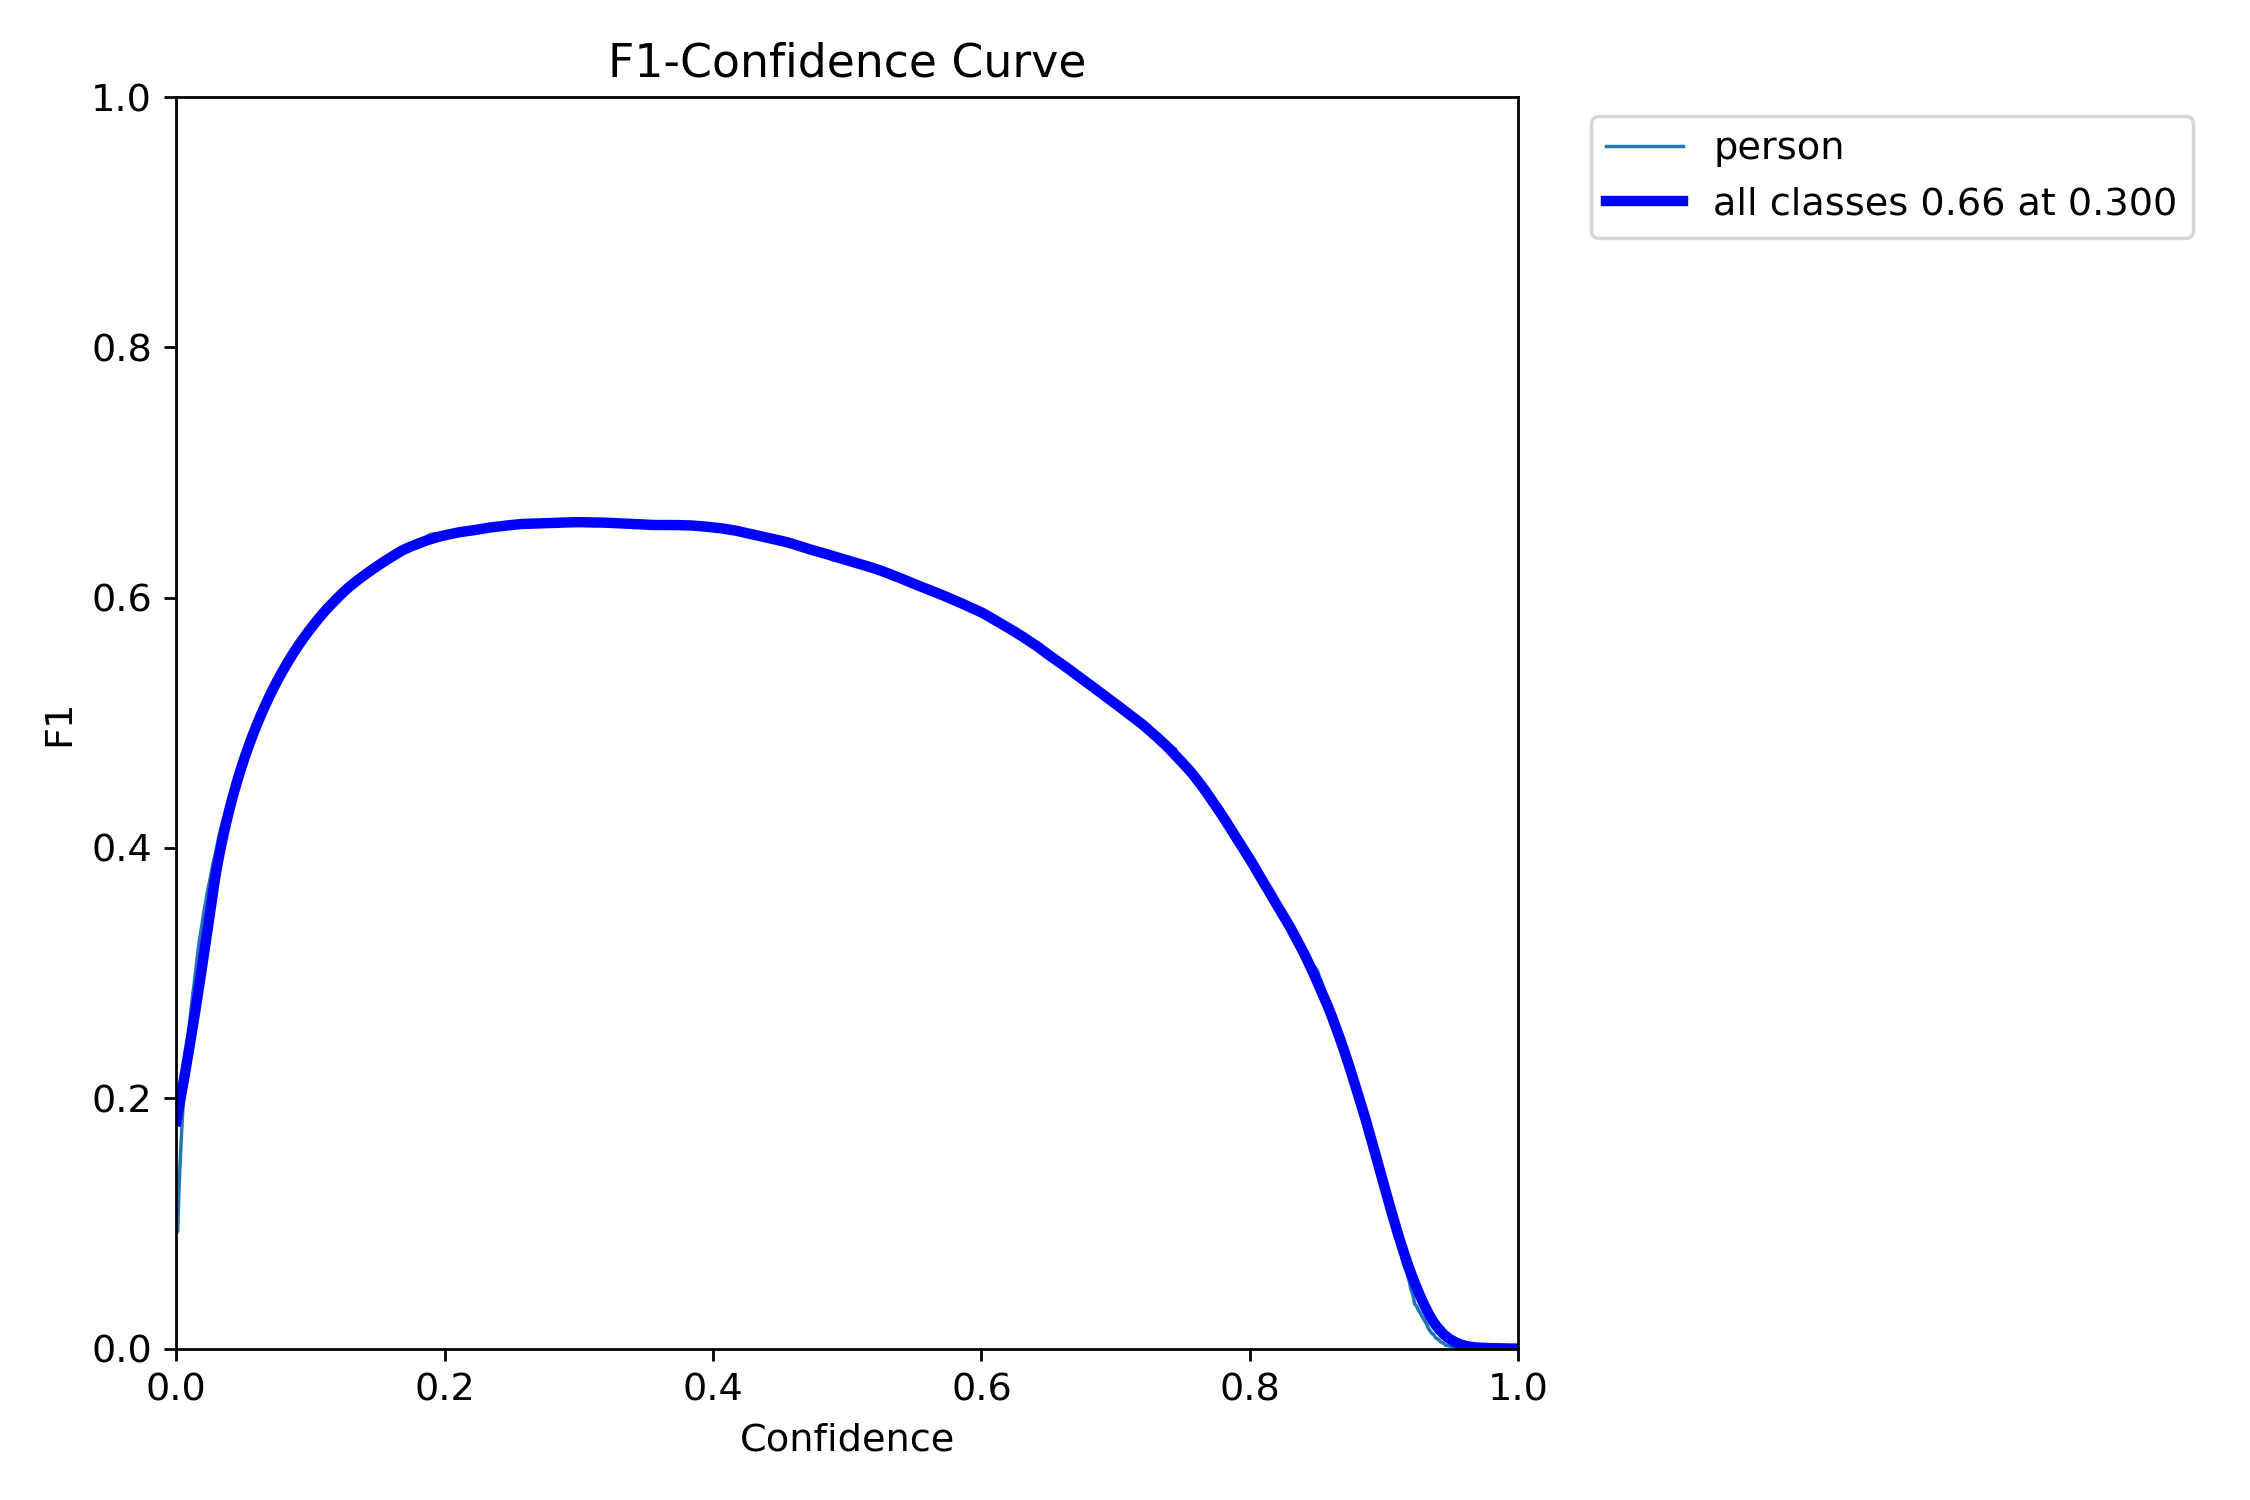

In [ ]:
Image(filename='/content/personDetection-yolov8n/train2/F1_curve.png', width=600)

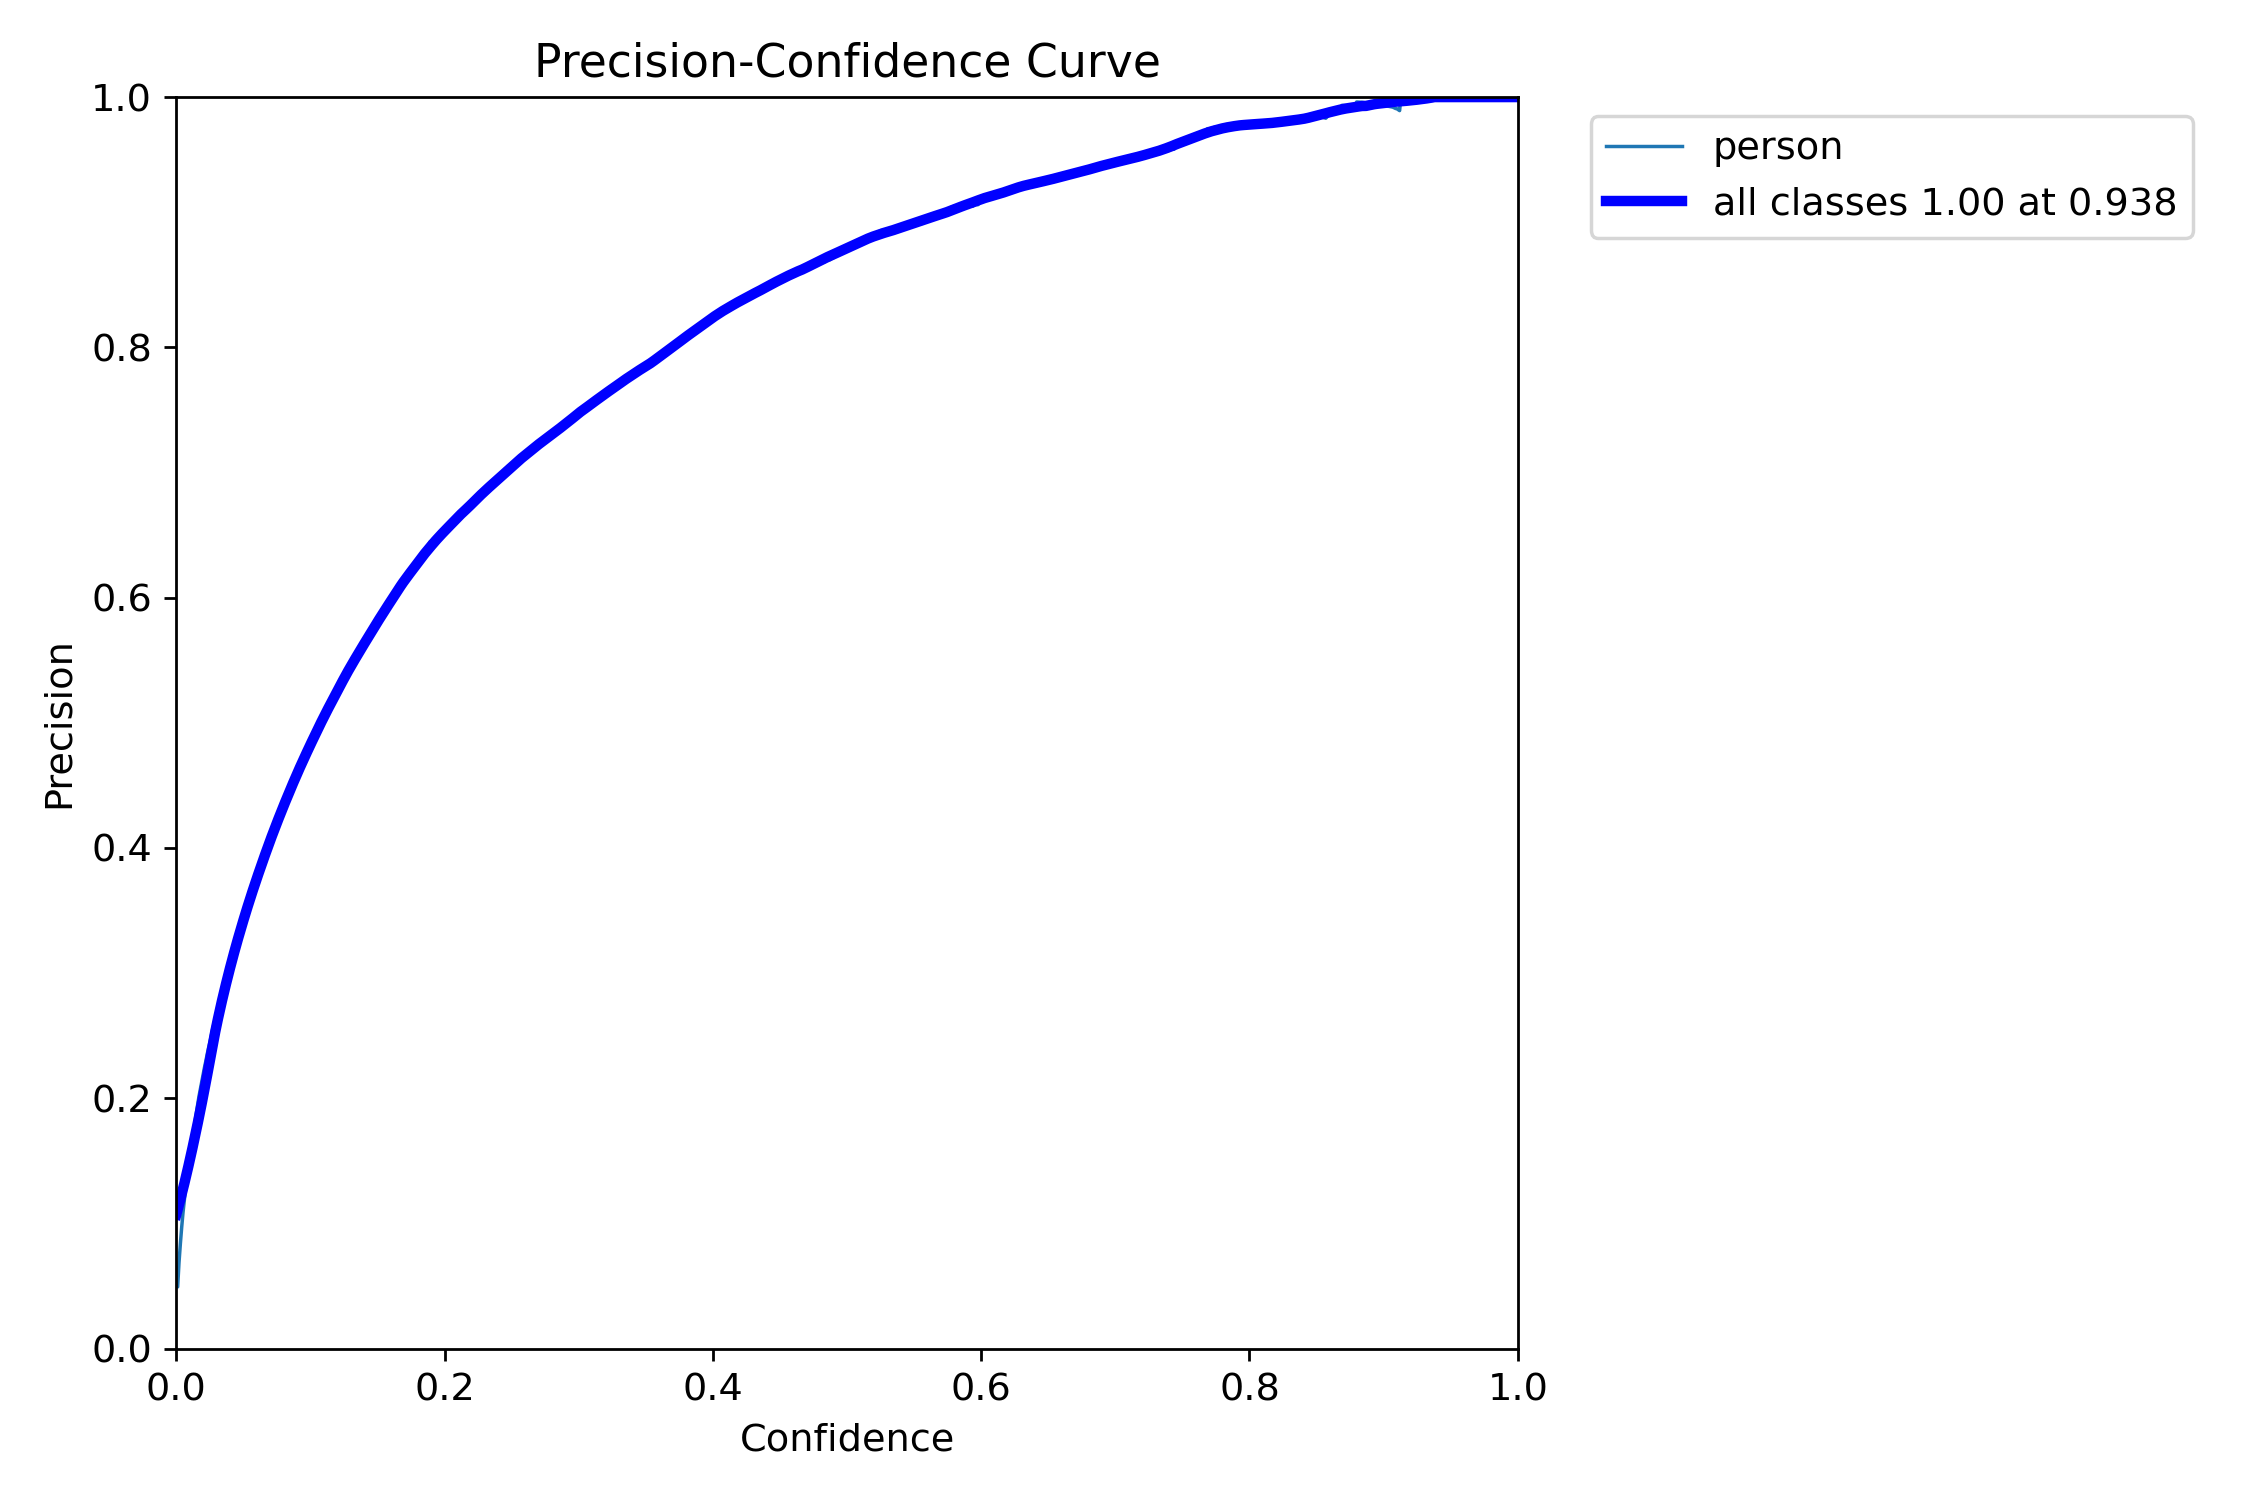

In [ ]:
Image(filename='/content/personDetection-yolov8n/train2/P_curve.png', width=600)

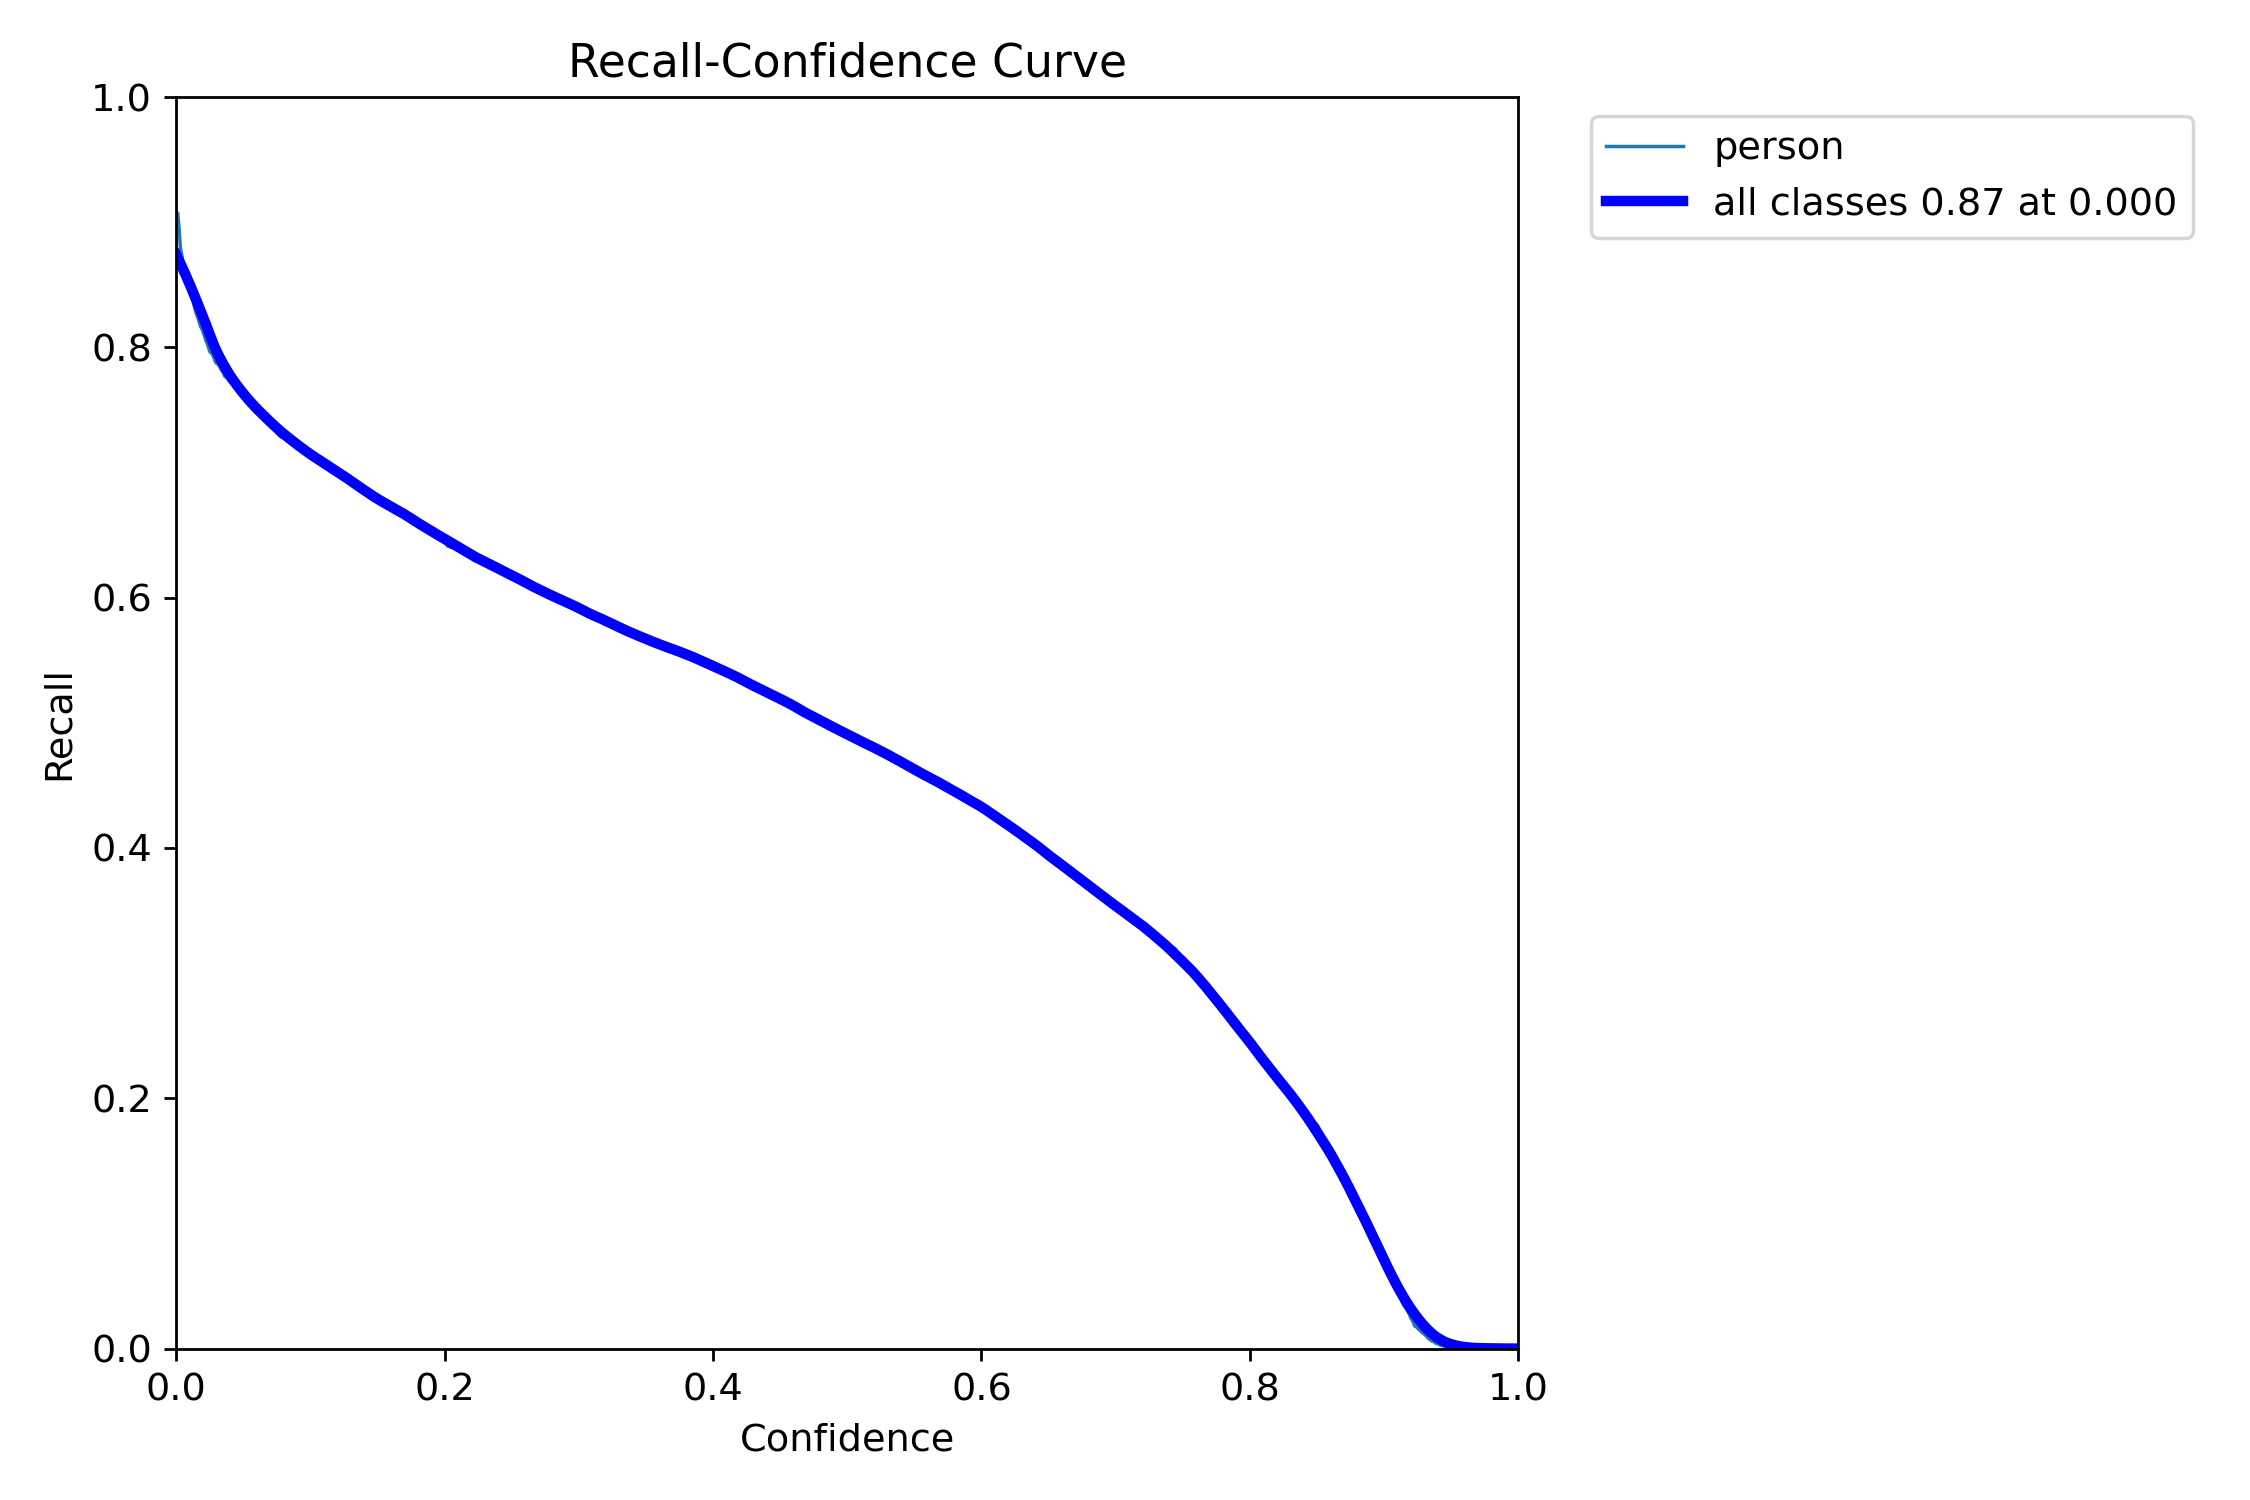

In [ ]:
Image(filename='/content/personDetection-yolov8n/train2/R_curve.png', width=600)

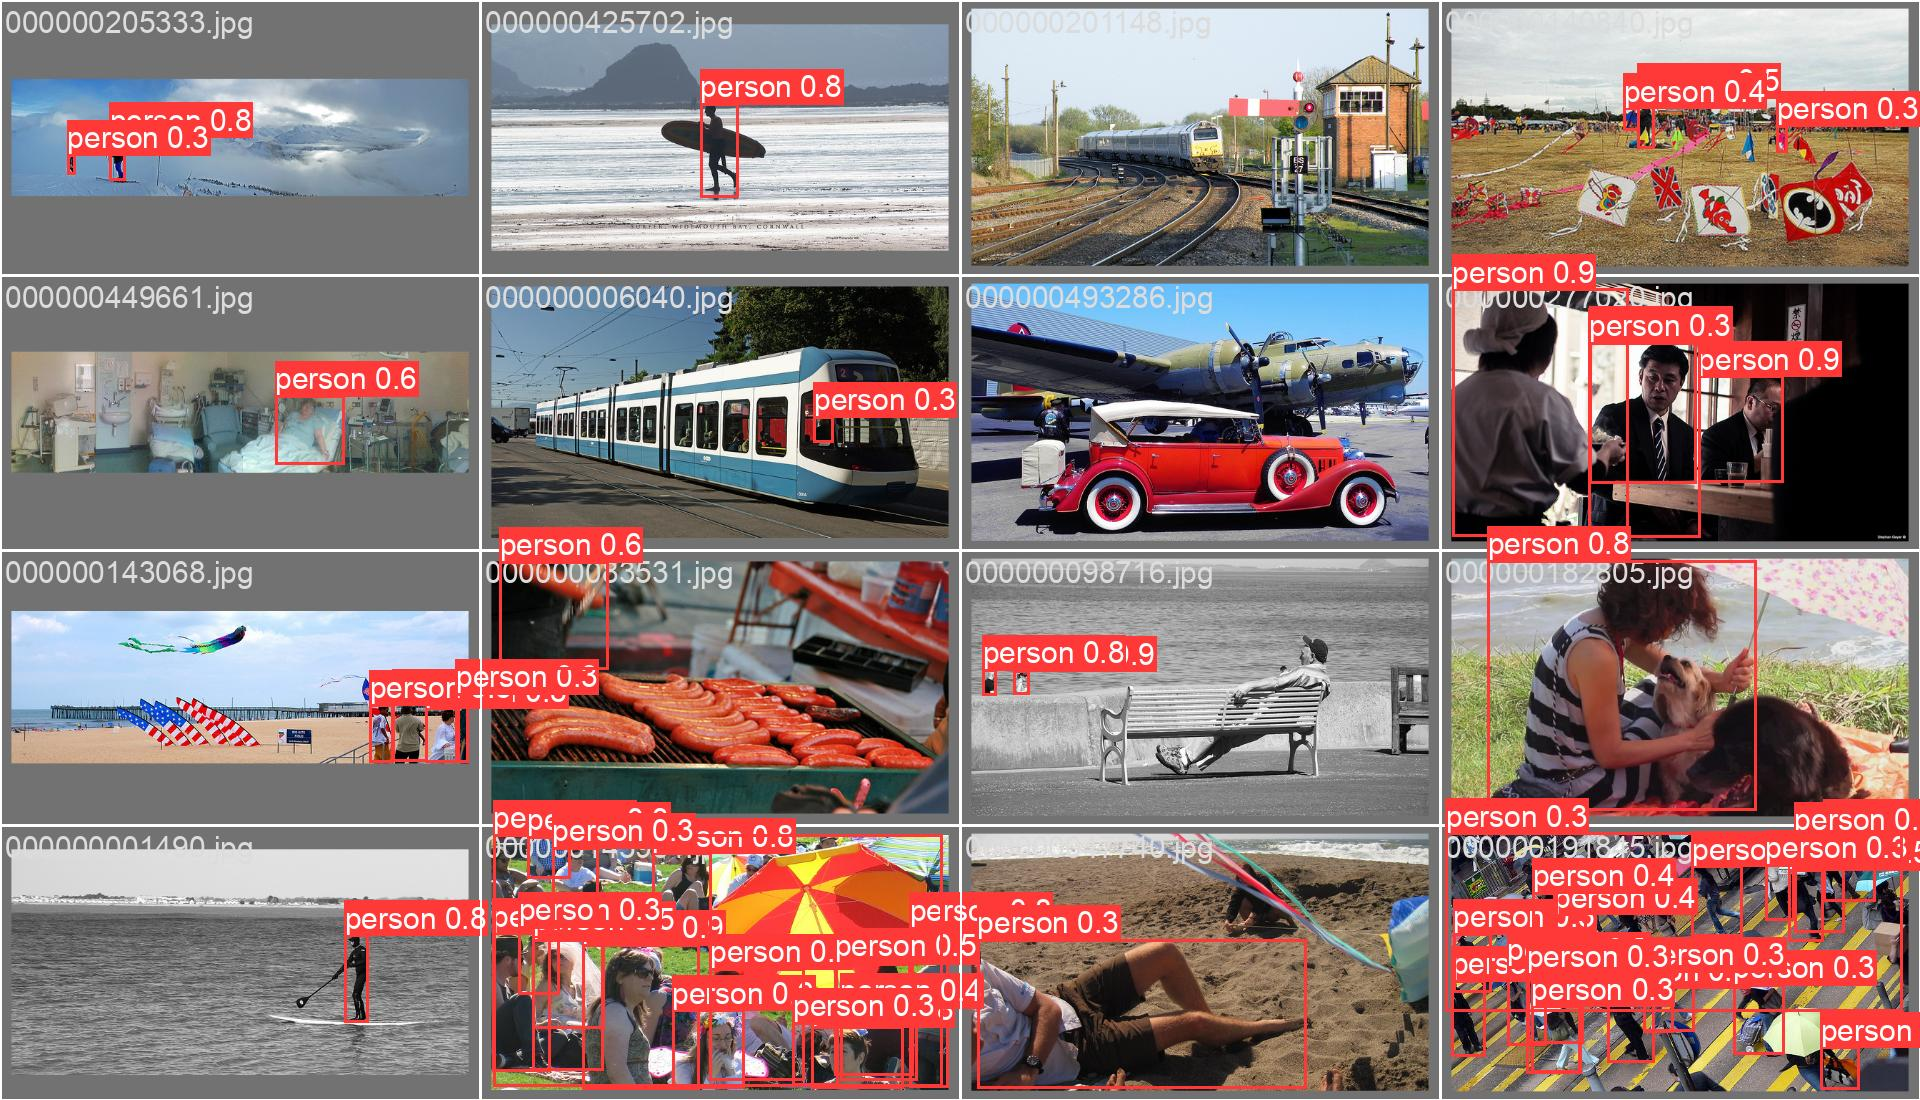

In [ ]:
#Model Prediction on test batch
Image(filename='/content/personDetection-yolov8n/train2/val_batch0_pred.jpg', width=600)

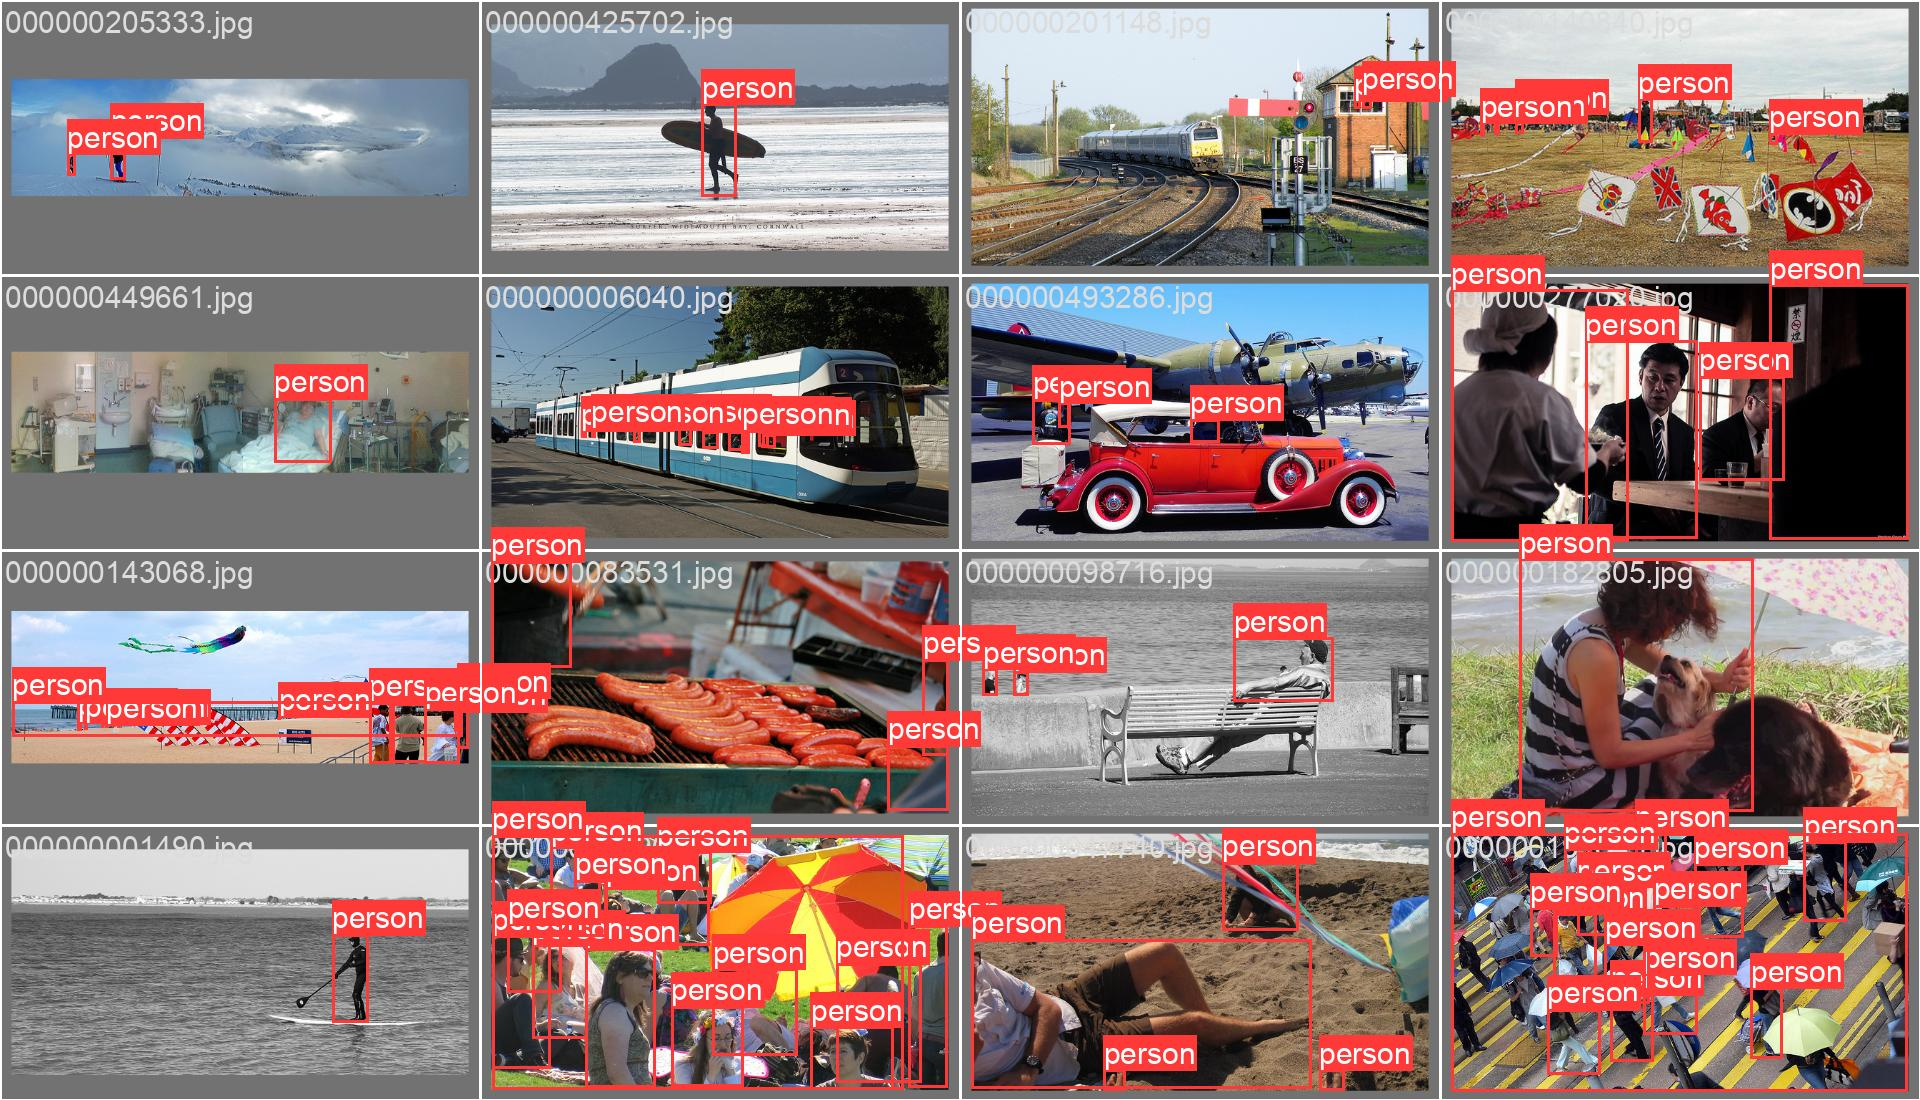

In [ ]:
Image(filename='/content/personDetection-yolov8n/train2/val_batch0_labels.jpg', width=600)

In [ ]:
test_results = model.predict('/content/tmp/oiv7-yolo/images/test/000000001490.jpg', save=True, imgsz=320, conf=0.5)


image 1/1 /content/tmp/oiv7-yolo/images/test/000000001490.jpg: 160x320 1 person, 102.6ms
Speed: 1.4ms preprocess, 102.6ms inference, 3.0ms postprocess per image at shape (1, 3, 160, 320)
Results saved to personDetection-yolov8n/train3


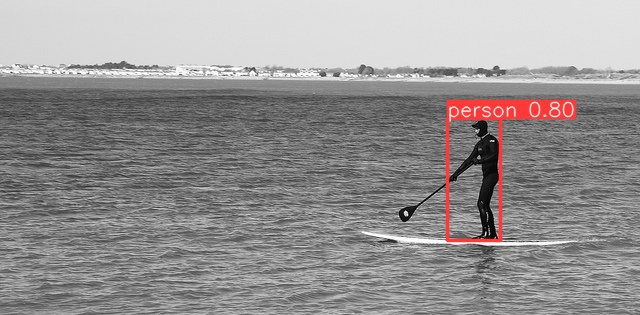

In [ ]:
Image(filename='/content/personDetection-yolov8n/train3/000000001490.jpg', width=600)

In [ ]:
video_results = model.predict('/content/People Walking Free Stock Footage, Royalty-Free No Copyright Content.mp4', save=True, conf=0.5)

In [ ]:
from subprocess import run

# Input video path
input_video_path = '/content/personDetection-yolov8/train5/People Walking Free Stock Footage, Royalty-Free No Copyright Content.avi'

# Output compressed video path
output_video_path = "/content/result_compressed.mp4"

# Compress the video using FFmpeg
run(["ffmpeg", "-i", input_video_path, "-vcodec", "libx264", output_video_path])

print("Video compression complete.")

In [ ]:
from IPython.display import HTML

# Display the video
HTML(f'<video controls src="{output_video_path}" width="400"></video>')